In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Part A - Domain - Telecom

# 1. Data understanding and Exploration

In [2]:
# 1A. Reading the Churn_1 csv file

churn1_df = pd.read_csv("TelcomCustomer-Churn_1.csv")
churn1_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [3]:
#1B.  Reading the Churn_2 csv file

churn2_df = pd.read_csv("TelcomCustomer-Churn_2.csv")
churn2_df.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

In [4]:
print("Churn 1",churn1_df.count())
print("")
print("Churn 2",churn2_df.count())


Churn 1 customerID         7043
gender             7043
SeniorCitizen      7043
Partner            7043
Dependents         7043
tenure             7043
PhoneService       7043
MultipleLines      7043
InternetService    7043
OnlineSecurity     7043
dtype: int64

Churn 2 customerID          7043
OnlineBackup        7043
DeviceProtection    7043
TechSupport         7043
StreamingTV         7043
StreamingMovies     7043
Contract            7043
PaperlessBilling    7043
PaymentMethod       7043
MonthlyCharges      7043
TotalCharges        7043
Churn               7043
dtype: int64


In [5]:
#1C.... Both the dataframes have equal number of rows 7043 and they have to be merged horizontally on the Customer ID

comb_df1 = pd.merge(churn1_df, churn2_df, on='customerID', indicator=True)

In [6]:
comb_df1   #............... _merge column indicates both the dataframes are merged

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0             No          No              No  Month-to-month              Yes   
1             No          No              No        One year               No   
2             No          No              No  Month-to-month              Yes   
3            Yes          No              No        One year               No   
4             No          No              No  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
7038         Yes         Yes             Yes        One year              Yes   
7039          No         Yes             Yes        One year              Yes   
7040          No          No              No  Month-to-month              Yes   
7041          No          No              No  Month-to-month              Yes   
7042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges TotalCharges  Churn _merge  
0              Electronic check          29.85        29.85     No   both  
1                  Mailed check          56.95       1889.5     No   both  
2                  Mailed check          53.85       108.15    Yes   both  
3     Bank transfer (automatic)          42.30      1840.75     No   both  
4              Electronic check          70.70       151.65    Yes   both  
...                         ...            ...          ...    ...    ...  
7038               Mailed check          84.80       1990.5     No   both  
7039    Credit card (automatic)         103.20       7362.9     No   both  
7040           Electronic check          29.60       346.45     No   both  
7041               Mailed check          74.40        306.6    Yes   both  
7042  Bank transfer (automatic)         105.65       6844.5     No   both  

[7043 rows x 22 columns]

In [7]:
comb_df = pd.merge(churn1_df, churn2_df, on='customerID')

In [8]:
#1D.  All the columns have been added to the new dataframes

print("churn1 shape",churn1_df.shape)
print("churn2 shape",churn2_df.shape)
print("combined df",comb_df.shape)

churn1 shape (7043, 10)
churn2 shape (7043, 12)
combined df (7043, 21)


In [9]:
churn1_df.eq(churn2_df).all(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [19]:
churn1_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity'],
      dtype='object')

In [20]:
churn2_df.columns

Index(['customerID', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
comb_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
comb_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
comb_df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [8]:
comb_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

# 2. Data clearning and Analysis

In [10]:
#2A.... Impute missing/unexpected values....

comb_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
comb_df.TotalCharges = pd.to_numeric(comb_df.TotalCharges, errors="coerce")

In [12]:
comb_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
comb_df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7032.000000
mean        0.162147    32.371149       64.761692   2283.300441
std         0.368612    24.559481       30.090047   2266.771362
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    401.450000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3794.737500
max         1.000000    72.000000      118.750000   8684.800000

In [13]:
comb_df['TotalCharges'].isnull().sum() #......... there are 11 missing values in TotalCharges

11

In [76]:
comb_df.isnull().values.any()

True

In [14]:
comb_df.isnull().sum().sum()

11

In [14]:
df1 = comb_df[comb_df.isna().any(axis=1)]

In [15]:
df1 #........... these are the rows with missing TotalCharges values

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

In [16]:
comb_df.sort_values(by="TotalCharges")

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
1654  2967-MXRAV    Male              0     Yes        Yes       1   
6489  9318-NKNFC    Male              0      No         No       1   
1151  8992-CEUEN  Female              0      No         No       1   
4939  9975-SKRNR    Male              0      No         No       1   
583   1423-BMPBQ  Female              0     Yes        Yes       1   
...          ...     ...            ...     ...        ...     ...   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
1654          Yes            No              No  No internet service  ...   
6489          Yes            No              No  No internet service  ...   
1151          Yes            No              No  No internet service  ...   
4939          Yes            No              No  No internet service  ...   
583           Yes            No              No  No internet service  ...   
...           ...           ...             ...                  ...  ...   
3826          Yes           Yes              No  No internet service  ...   
4380          Yes            No              No  No internet service  ...   
5218          Yes            No              No  No internet service  ...   
6670          Yes           Yes             DSL                   No  ...   
6754          Yes           Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
1654  No internet service  No internet service  No internet service   
6489  No internet service  No internet service  No internet service   
1151  No internet service  No internet service  No internet service   
4939  No internet service  No internet service  No internet service   
583   No internet service  No internet service  No internet service   
...                   ...                  ...                  ...   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies        Contract PaperlessBilling  \
1654  No internet service        One year               No   
6489  No internet service  Month-to-month              Yes   
1151  No internet service  Month-to-month               No   
4939  No internet service  Month-to-month               No   
583   No internet service  Month-to-month              Yes   
...                   ...             ...              ...   
3826  No internet service        Two year               No   
4380  No internet service        Two year               No   
5218  No internet service        One year              Yes   
6670                   No        Two year               No   
6754                   No        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
1654               Mailed check          18.80         18.80     No  
6489               Mailed check          18.85         18.85    Yes  
1151           Electronic check          18.85         18.85     No  
4939               Mailed check          18.90         18.90     No  
583                Mailed check          19.00         19.00     No  
...                         ...            ...           ...    ...  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218        

In [70]:
# Replace using median 
median = comb_df['TotalCharges'].median()
comb_df['TotalCharges'].fillna(median, inplace=True)

In [71]:
comb_df['TotalCharges'].isnull().sum()  #........... after replacing with median........ there are no more missing values

0

In [72]:
comb_df.describe()

SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count    7043.000000  7043.000000     7043.000000   7043.000000
mean        0.162147    32.371149       64.761692   2281.916928
std         0.368612    24.559481       30.090047   2265.270398
min         0.000000     0.000000       18.250000     18.800000
25%         0.000000     9.000000       35.500000    402.225000
50%         0.000000    29.000000       70.350000   1397.475000
75%         0.000000    55.000000       89.850000   3786.600000
max         1.000000    72.000000      118.750000   8684.800000

In [ ]:
#2A........... Other than TotalCharges column all other columns had no missing values or null values....

# But those Null values in Total Charges were not being picked up by pandas initially and was able to find it after
# the column was changed to_numeric

#... There were 11 Null values in TotalCharges column and they have been replaced by Median values.

In [73]:
for i in comb_df.columns:
    if ((i in ["customerID","tenure","MonthlyCharges","TotalCharges"])):
         print()
    else:   
        print("% S unique values", i)
        print(comb_df[i].value_counts())
        print("")
    



% S unique values gender
Male      3555
Female    3488
Name: gender, dtype: int64

% S unique values SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

% S unique values Partner
No     3641
Yes    3402
Name: Partner, dtype: int64

% S unique values Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64


% S unique values PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64

% S unique values MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

% S unique values InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

% S unique values OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

% S unique values OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64



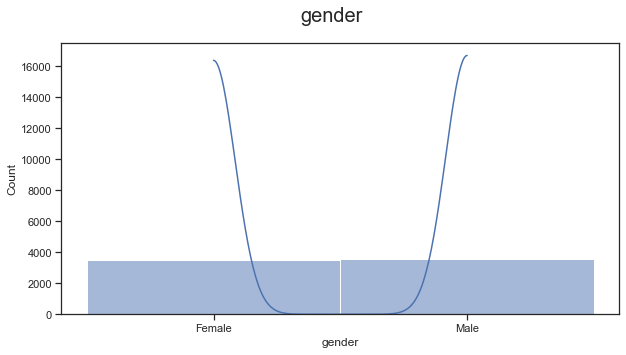

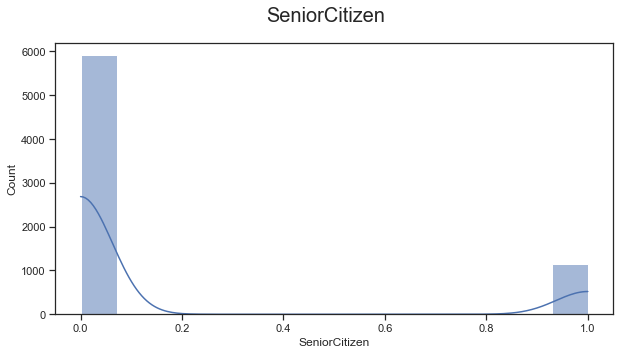

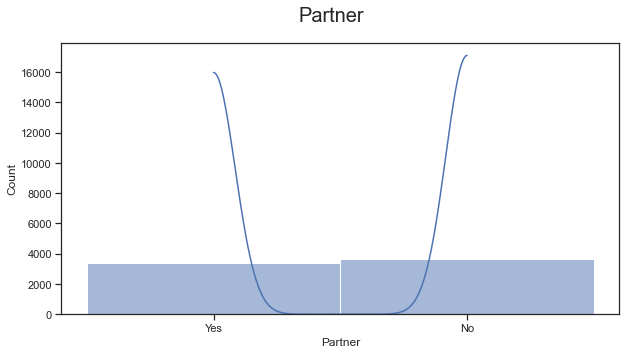

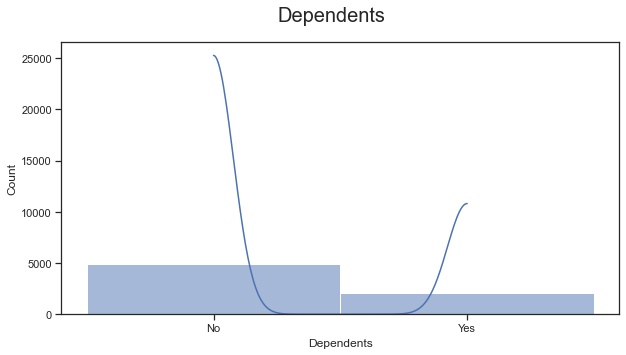

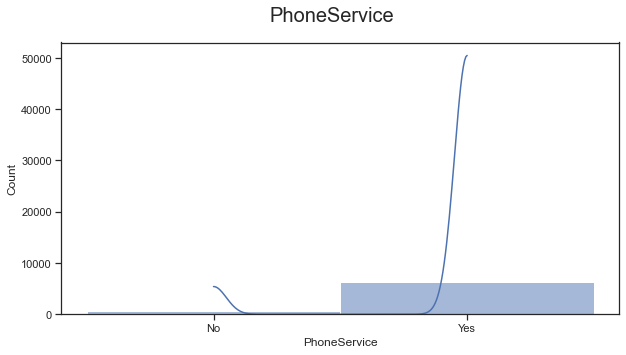

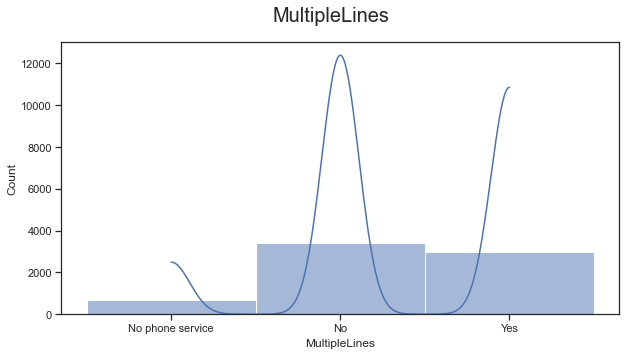

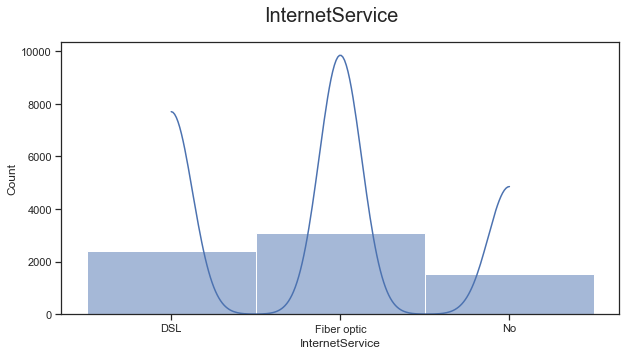

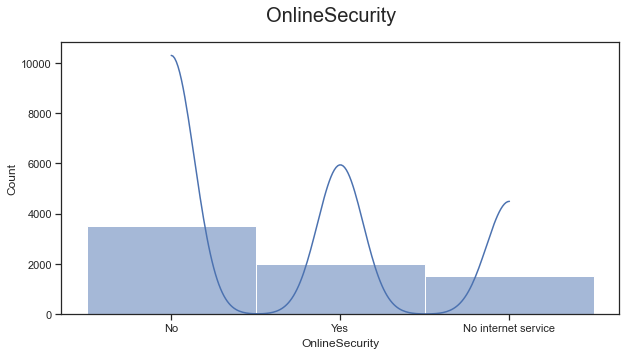

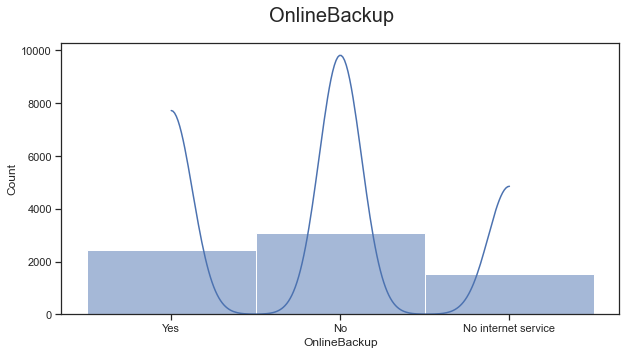

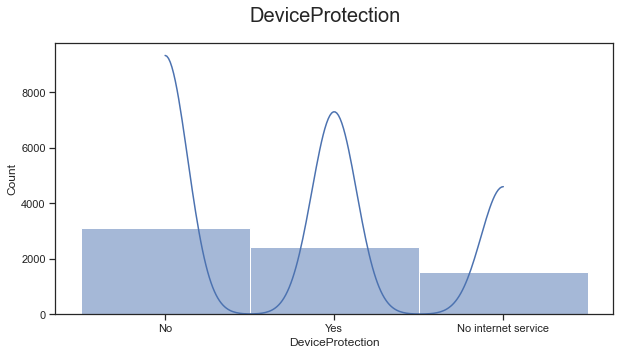

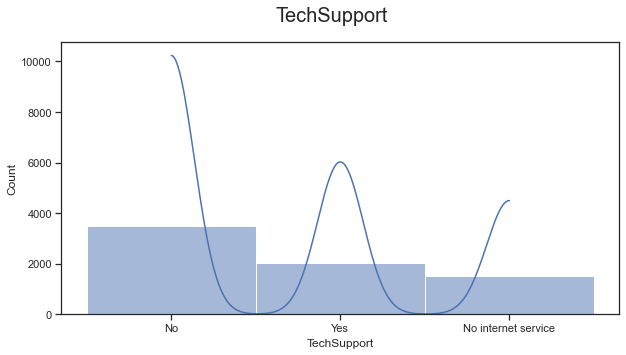

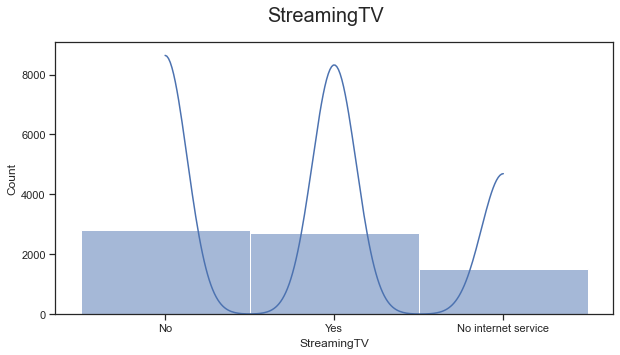

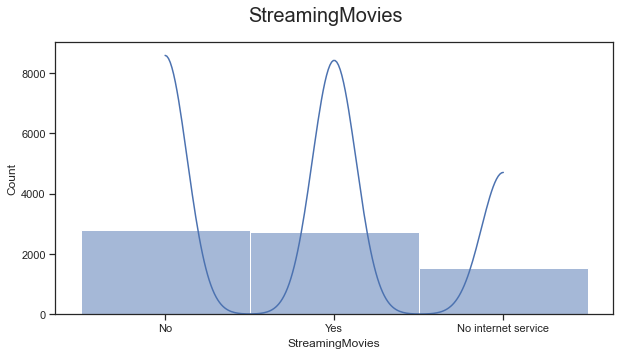

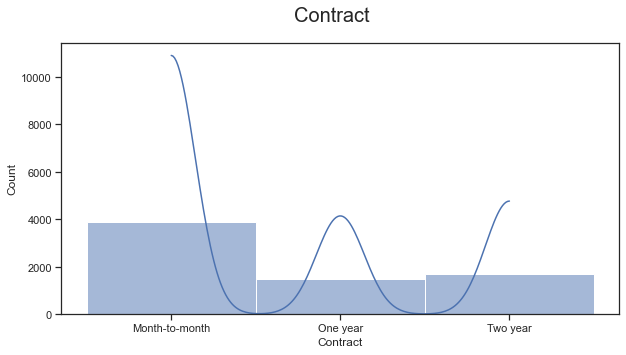

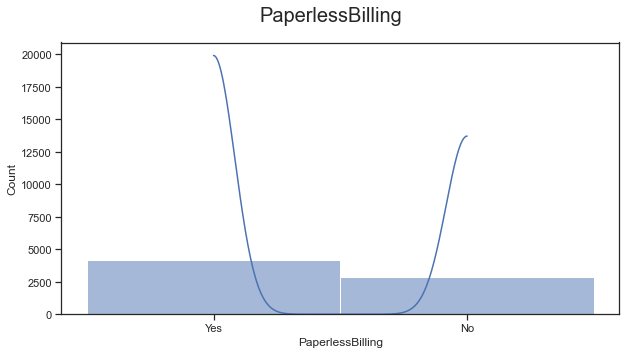

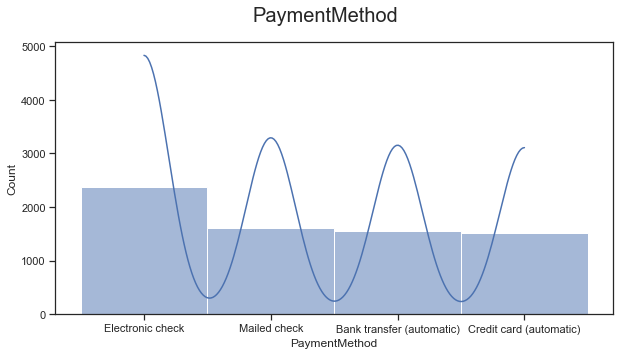

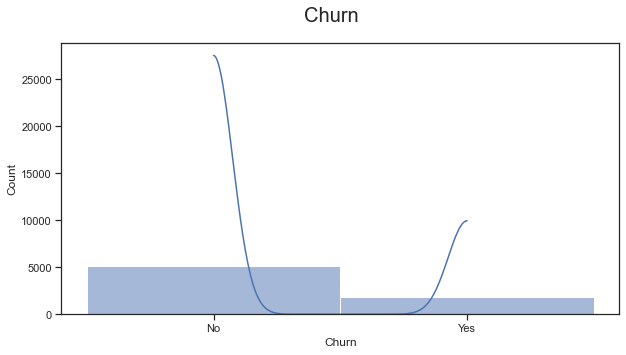

In [74]:
for i in comb_df.columns:
    if ((i in ["customerID","tenure","MonthlyCharges","TotalCharges"])):
        print()
    else:   
        fig = plt.figure(figsize = (10,5))
        plt.rcParams.update({'figure.max_open_warning': 0})
        ax = fig.gca()
        fig.suptitle(i, fontsize=20)
        #plt.figure(i)
        sns.histplot(comb_df[i], kde=True, ax=ax)
        #print("")

In [75]:
comb_df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [76]:
#2B..... Converting Continuous variable column TotalCharges to float

comb_df['TotalCharges'] = pd.to_numeric(comb_df['TotalCharges'],errors='coerce')
                                
comb_df['TotalCharges'] = comb_df['TotalCharges'].astype(float)

In [77]:
comb_df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [78]:
# 2C........... Function to accept dataframe and then print pie charts for all Categorical columns

def pie_df(df):
        
    for i in df.columns:
        if (df[i].dtypes == "object"):
            
            if i in ["customerID","TotalCharges"]:
                print()
            else:
                #print("column is %S",i)                
                                
                df.groupby(i).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')                
                font1 = {'family':'serif','color':'blue','size':20}
                plt.title(i, fontdict = font1)    
                
                plt.tight_layout()
                plt.show()

   

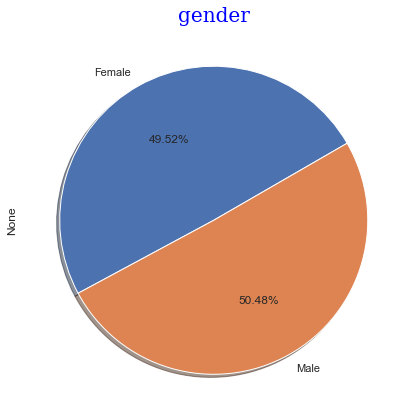

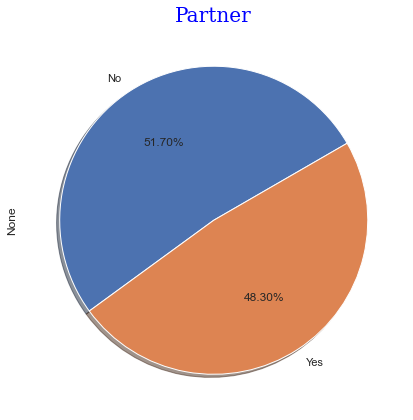

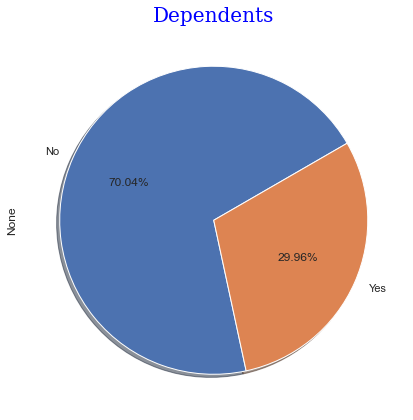

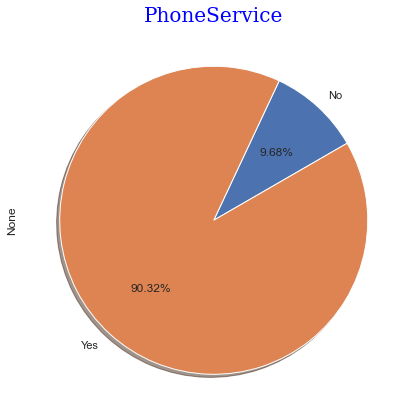

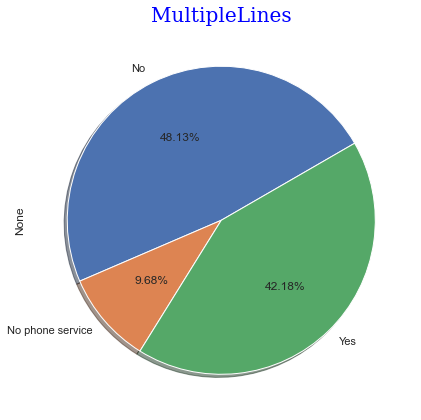

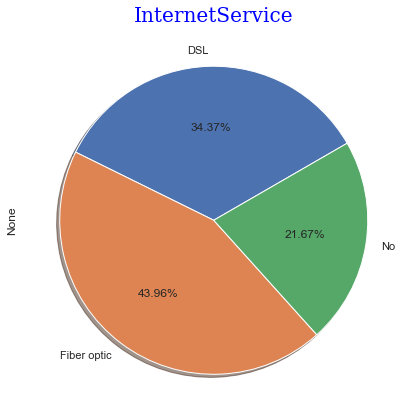

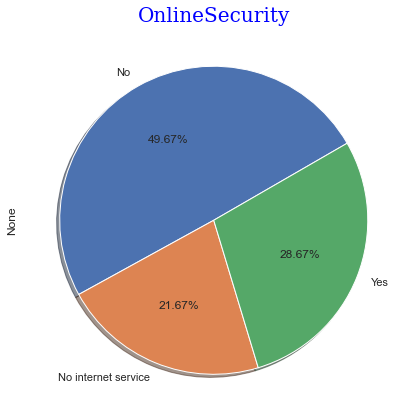

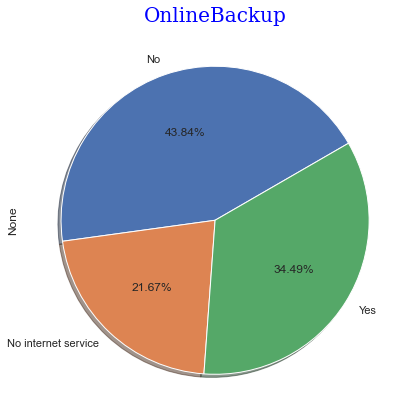

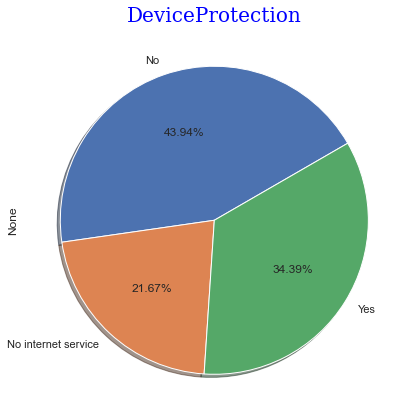

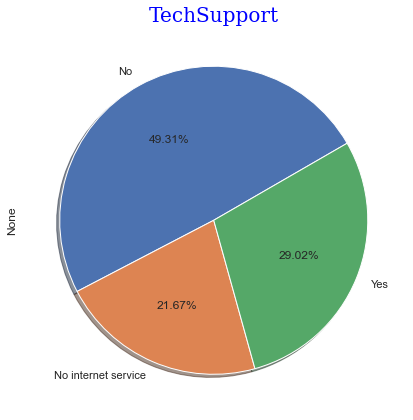

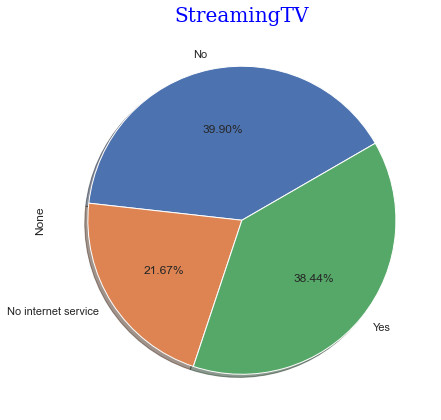

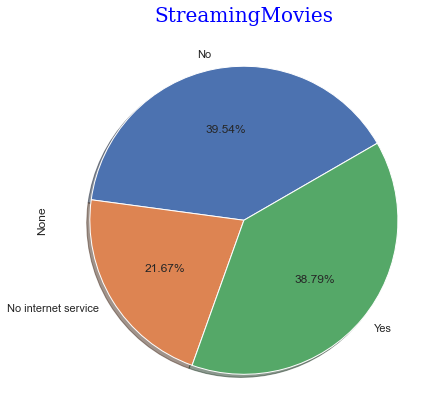

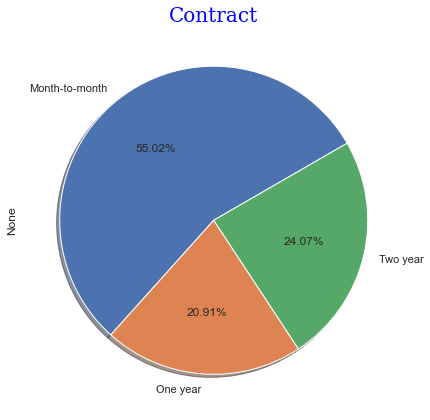

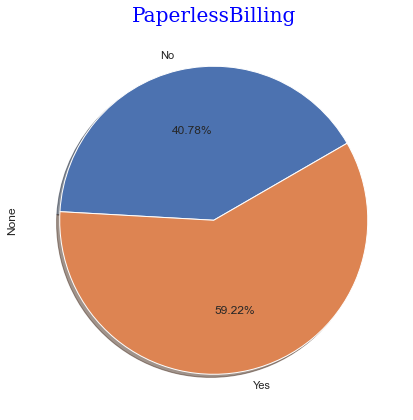

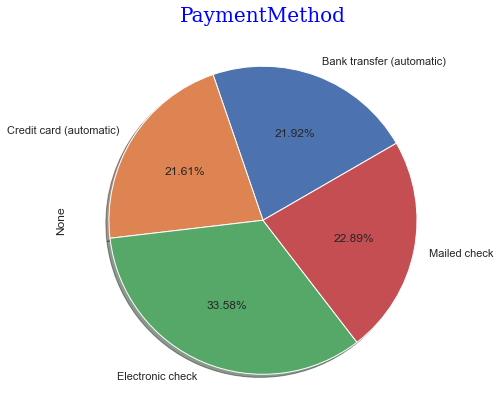

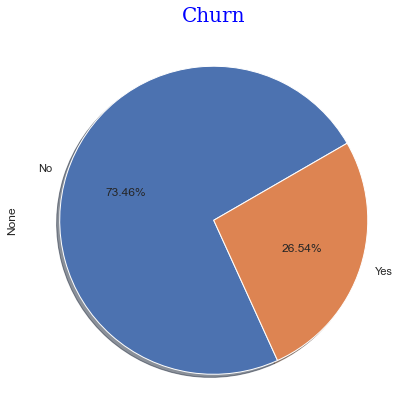

In [79]:
pie_df(comb_df)

# 2D.......... Insights on question 2C

There are totally 19 categorical value columns

1. Gender - There is almost an equi balance of Male and Female customers
2. Partner - There is again almost equi balance of Customers having partners and no partners
3. Dependents - only 1/3rd of the Customers almost 30% have dependents while the remaining 70% have no dependents
4. PhoneService - A huge 90% of the Customers have availed for Phoneservice while a small 10% have not opted for it
5. Multiplelines - About 42% of the customers have multiple lines while 48% of the customers do nto have multiple lines
6. Internetservice - A majority of Customers 44% have Fibre optic, 34% have DSL while 21% have no Internet servicce
7. OnlineSecurity - 50% of customers have not availed Onlinesecurity and only 28% of the customers have taken this service, 
                    21% in any case have no Internetservice
8. OnlineBackup - Only 34.5% of the Customers have availed this service, 44% have not while 21% have no Internetservice at all
9. DeviceProtection - Numbers almost look similar to the OnlineBackup 34.5 - yes, 44% no, 21% no Internetservice
10. Techsupport - 29% of the customers have only signed up for this, 49% have'nt, while 21% have no Internetservice
11. StreamingTV - Very equally distributed... 38% signed up, 39% not signed up, 21% no Internetservice
12. STreamingMovies - Almost similar distribution as found in StreamingTV
13. Contract - 55% of the customers going for month to month, 21% one year & 24% for two year contracts
14. Paperless Billing - Almost 60% have opted for this, while the remaining 40% are for paper billing
15. PaymentMethod - Credit card choice - 21.6%, Bank transfers - 22%, Electronic transfer - 35%, Mailed checks - 23%
16. Churn - This is the Target variable - 73.5% look to be Loyal customers while 26.5% Churn out

In [80]:
# 2E... Encoding all the Categorical variables 

#classifying the categorical variables into 2 variants (Label encoding & One Hot encoding)

replaceStruct = {
                "MultipleLines":     {"Yes": 1, "No": 0, "No phone service": -1},
                "OnlineSecurity":    {"Yes": 1, "No": 0 ,"No internet service": -1},
                "OnlineBackup":      {"Yes": 1, "No": 0 ,"No internet service": -1},
                "DeviceProtection":  {"Yes": 1, "No": 0 ,"No internet service": -1},
                "TechSupport":       {"Yes": 1, "No": 0 ,"No internet service": -1},
                "StreamingTV":       {"Yes": 1, "No": 0 ,"No internet service": -1},
                "StreamingMovies":   {"Yes": 1, "No": 0 ,"No internet service": -1},
                "Contract":          {"Month-to-month": 1, "One year": 2 ,"Two year": 3},
                "Churn":             {"Yes": 1, "No": 0 },                
                "Partner":           {"Yes": 1, "No": 0 },
                "Dependents":        {"Yes": 1, "No": 0 },
                "PhoneService":      {"Yes": 1, "No": 0 },
                "PaperlessBilling":  {"Yes": 1, "No": 0 } 
                    }
oneHotCols=["PaymentMethod","InternetService","gender"]


In [81]:
replaceStruct

{'MultipleLines': {'Yes': 1, 'No': 0, 'No phone service': -1},
 'OnlineSecurity': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'OnlineBackup': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'DeviceProtection': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'TechSupport': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'StreamingTV': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'StreamingMovies': {'Yes': 1, 'No': 0, 'No internet service': -1},
 'Contract': {'Month-to-month': 1, 'One year': 2, 'Two year': 3},
 'Churn': {'Yes': 1, 'No': 0},
 'Partner': {'Yes': 1, 'No': 0},
 'Dependents': {'Yes': 1, 'No': 0},
 'PhoneService': {'Yes': 1, 'No': 0},
 'PaperlessBilling': {'Yes': 1, 'No': 0}}

In [82]:
oneHotCols

['PaymentMethod', 'InternetService', 'gender']

In [83]:
new_df=comb_df.replace(replaceStruct)
new_df=pd.get_dummies(new_df, columns=oneHotCols)
new_df.head(10)

customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0  7590-VHVEG              0        1           0       1             0   
1  5575-GNVDE              0        0           0      34             1   
2  3668-QPYBK              0        0           0       2             1   
3  7795-CFOCW              0        0           0      45             0   
4  9237-HQITU              0        0           0       2             1   
5  9305-CDSKC              0        0           0       8             1   
6  1452-KIOVK              0        0           1      22             1   
7  6713-OKOMC              0        0           0      10             0   
8  7892-POOKP              0        1           0      28             1   
9  6388-TABGU              0        0           1      62             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  Churn  \
0             -1               0             1                 0  ...      0   
1              0               1             0                 1  ...      0   
2              0               1             1                 0  ...      1   
3             -1               1             0                 1  ...      0   
4              0               0             0                 0  ...      1   
5              1               0             0                 1  ...      1   
6              1               0             1                 0  ...      0   
7             -1               1             0                 0  ...      0   
8              1               0             0                 1  ...      1   
9              0               1             1                 0  ...      0   

   PaymentMethod_Bank transfer (automatic)  \
0                                        0   
1                                        0   
2                                        0   
3                                        1   
4                                        0   
5                                        0   
6                                        0   
7                                        0   
8                                        0   
9                                        1   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   
5                                      0                               1   
6                                      1                               0   
7                                      0                               0   
8                                      0                               1   
9                                      0                               0   

   PaymentMethod_Mailed check  InternetService_DSL  \
0                           0                    1   
1                           1                    1   
2                           1                    1   
3                           0                    1   
4                           0                    0   
5                           0                    0   
6                           0                    0   
7                           1                    1   
8                           0                    0   
9                           0                    1   

   InternetService_Fiber optic  InternetService_No  gender_Female  gender_Male  
0                            0                   0              1            0  
1                            0                   0              0            1  
2                            0                   0              0            1  
3                            0   

In [84]:
for i in new_df.columns:
    if ((i in ["customerID","tenure","MonthlyCharges","TotalCharges"])):
         print()
    else:   
        print("% S unique values", i)
        print(new_df[i].value_counts())
        print("")
    



% S unique values SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

% S unique values Partner
0    3641
1    3402
Name: Partner, dtype: int64

% S unique values Dependents
0    4933
1    2110
Name: Dependents, dtype: int64


% S unique values PhoneService
1    6361
0     682
Name: PhoneService, dtype: int64

% S unique values MultipleLines
 0    3390
 1    2971
-1     682
Name: MultipleLines, dtype: int64

% S unique values OnlineSecurity
 0    3498
 1    2019
-1    1526
Name: OnlineSecurity, dtype: int64

% S unique values OnlineBackup
 0    3088
 1    2429
-1    1526
Name: OnlineBackup, dtype: int64

% S unique values DeviceProtection
 0    3095
 1    2422
-1    1526
Name: DeviceProtection, dtype: int64

% S unique values TechSupport
 0    3473
 1    2044
-1    1526
Name: TechSupport, dtype: int64

% S unique values StreamingTV
 0    2810
 1    2707
-1    1526
Name: StreamingTV, dtype: int64

% S unique values StreamingMovies
 0    2785
 1    2732
-1    1526
Name:

In [85]:
new_df

customerID  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0     7590-VHVEG              0        1           0       1             0   
1     5575-GNVDE              0        0           0      34             1   
2     3668-QPYBK              0        0           0       2             1   
3     7795-CFOCW              0        0           0      45             0   
4     9237-HQITU              0        0           0       2             1   
...          ...            ...      ...         ...     ...           ...   
7038  6840-RESVB              0        1           1      24             1   
7039  2234-XADUH              0        1           1      72             1   
7040  4801-JZAZL              0        1           1      11             0   
7041  8361-LTMKD              1        1           0       4             1   
7042  3186-AJIEK              0        0           0      66             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0                -1               0             1                 0  ...   
1                 0               1             0                 1  ...   
2                 0               1             1                 0  ...   
3                -1               1             0                 1  ...   
4                 0               0             0                 0  ...   
...             ...             ...           ...               ...  ...   
7038              1               1             0                 1  ...   
7039              1               0             1                 1  ...   
7040             -1               1             0                 0  ...   
7041              1               0             0                 0  ...   
7042              0               1             0                 1  ...   

      Churn  PaymentMethod_Bank transfer (automatic)  \
0         0                                        0   
1         0                                        0   
2         1                                        0   
3         0                                        1   
4         1                                        0   
...     ...                                      ...   
7038      0                                        0   
7039      0                                        0   
7040      0                                        0   
7041      1                                        0   
7042      0                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                         0                               1   
1                                         0                               0   
2                                         0                               0   
3                                         0                               0   
4                                         0                               1   
...                                     ...                             ...   
7038                                      0                               0   
7039                                      1                               0   
7040                                      0                               1   
7041                                      0                               0   
7042                                      0                               0   

      PaymentMethod_Mailed check  InternetService_DSL  \
0                              0                    1   
1                              1                    1   
2                              1                    1   
3                              0                    1   
4                              0                    0   
...                          ...                  ...   
7038                           1                    1   
7039                           0                    0   
7040                 

In [86]:
new_df.shape

(7043, 27)

In [ ]:
# From 21 columns it has increased to 27 since there are new columns added for Payment Method, Internet service & gender
# mentioned in One Hot encoding

In [87]:
new_df.corr()

SeniorCitizen   Partner  Dependents  \
SeniorCitizen                                 1.000000  0.016479   -0.211185   
Partner                                       0.016479  1.000000    0.452676   
Dependents                                   -0.211185  0.452676    1.000000   
tenure                                        0.016567  0.379697    0.159712   
PhoneService                                  0.008576  0.017706   -0.001762   
MultipleLines                                 0.113791  0.117307   -0.019657   
OnlineSecurity                                0.081878  0.091303   -0.029721   
OnlineBackup                                  0.144828  0.090753   -0.062775   
DeviceProtection                              0.140298  0.098664   -0.069078   
TechSupport                                   0.067457  0.076551   -0.040788   
StreamingTV                                   0.167188  0.079785   -0.086739   
StreamingMovies                               0.176469  0.075098   -0.101475   
Contract                                     -0.142554  0.294806    0.243187   
PaperlessBilling                              0.156530 -0.014877   -0.111377   
MonthlyCharges                                0.220173  0.096848   -0.113890   
TotalCharges                                  0.102652  0.318364    0.063593   
Churn                                         0.150889 -0.150448   -0.164221   
PaymentMethod_Bank transfer (automatic)      -0.016159  0.110706    0.052021   
PaymentMethod_Credit card (automatic)        -0.024135  0.082029    0.060267   
PaymentMethod_Electronic check                0.171718 -0.083852   -0.150642   
PaymentMethod_Mailed check                   -0.153477 -0.095125    0.059071   
InternetService_DSL                          -0.108322 -0.000851    0.052010   
InternetService_Fiber optic                   0.255338  0.000304   -0.165818   
InternetService_No                           -0.182742  0.000615    0.139812   
gender_Female                                 0.001874  0.001808   -0.010517   
gender_Male                                  -0.001874 -0.001808    0.010517   

                                           tenure  PhoneService  \
SeniorCitizen                            0.016567      0.008576   
Partner                                  0.379697      0.017706   
Dependents                               0.159712     -0.001762   
tenure                                   1.000000      0.008448   
PhoneService                             0.008448      1.000000   
MultipleLines                            0.258958      0.675070   
OnlineSecurity                           0.232373     -0.159989   
OnlineBackup                             0.253743     -0.129770   
DeviceProtection                         0.253999     -0.142012   
TechSupport                              0.230522     -0.161930   
StreamingTV                              0.201053     -0.108239   
StreamingMovies                          0.205031     -0.114715   
Contract                                 0.671607      0.002247   
PaperlessBilling                         0.006152      0.016505   
MonthlyCharges                           0.247900      0.247398   
TotalCharges                             0.825464      0.113013   
Churn                                   -0.352229      0.011942   
PaymentMethod_Bank transfer (automatic)  0.243510      0.007556   
PaymentMethod_Credit card (automatic)    0.233006     -0.007721   
PaymentMethod_Electronic check          -0.208363      0.003062   
PaymentMethod_Mailed check              -0.233852     -0.003319   
InternetService_DSL                      0.013274     -0.452425   
InternetService_Fiber optic              0.019720      0.289999   
InternetService_No                      -0.039062      0.172209   
gender_Female                           -0.005106      0.006488   
gender_Male                              0.005106     -0.006488   

                                         MultipleLines  OnlineSecurity

<AxesSubplot:>

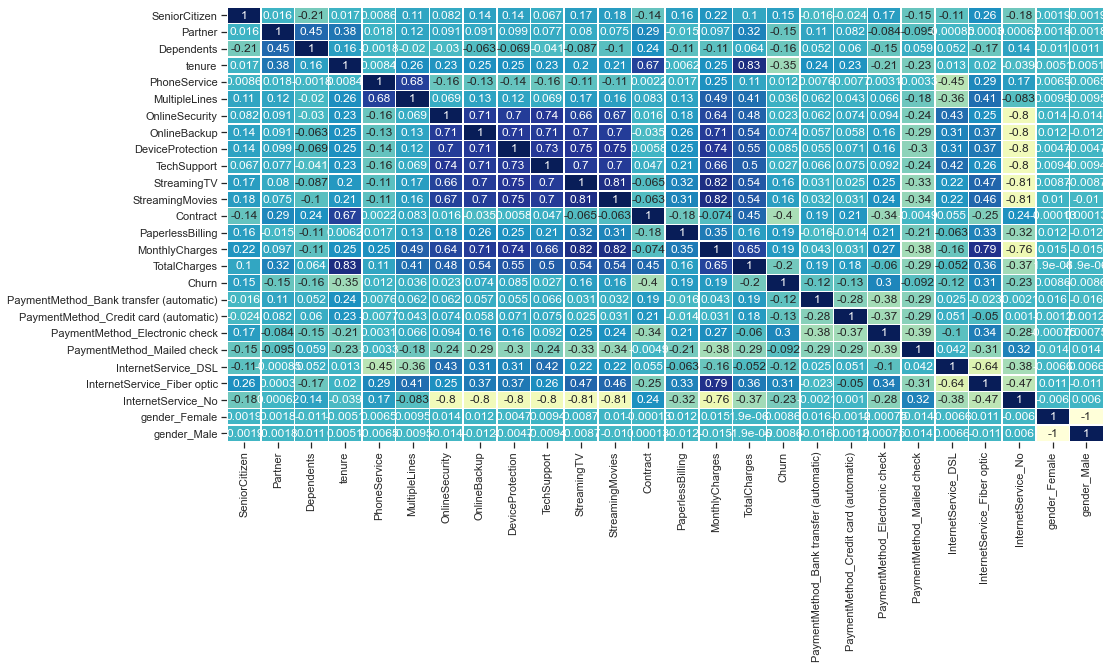

In [88]:
sns.set(rc={'figure.figsize':(15.7,8)})

sns.set(style="ticks", color_codes=True)

sns.heatmap(new_df.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")

In [89]:
# 2F...... Splitting data into 80% Train and 20% Test

X = new_df.drop(["customerID","Churn"], axis=1)   #........... Independent variables, 
y = new_df['Churn']                           #.............. Dependent variable


In [90]:
X.dtypes

SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
Contract                                     int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
PaymentMethod_Bank transfer (automatic)      uint8
PaymentMethod_Credit card (automatic)        uint8
PaymentMethod_Electronic check               uint8
PaymentMethod_Mailed check     

In [91]:
X.describe()

SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7043.000000  7043.000000  7043.000000  7043.000000   7043.000000   
mean        0.162147     0.483033     0.299588    32.371149      0.903166   
std         0.368612     0.499748     0.458110    24.559481      0.295752   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  \
count    7043.000000     7043.000000   7043.000000       7043.000000   
mean        0.325004        0.069999      0.128212          0.127219   
std         0.642730        0.706051      0.738369          0.737868   
min        -1.000000       -1.000000     -1.000000         -1.000000   
25%         0.000000        0.000000      0.000000          0.000000   
50%         0.000000        0.000000      0.000000          0.000000   
75%         1.000000        1.000000      1.000000          1.000000   
max         1.000000        1.000000      1.000000          1.000000   

       TechSupport  ...  TotalCharges  \
count  7043.000000  ...   7043.000000   
mean      0.073548  ...   2281.916928   
std       0.708201  ...   2265.270398   
min      -1.000000  ...     18.800000   
25%       0.000000  ...    402.225000   
50%       0.000000  ...   1397.475000   
75%       1.000000  ...   3786.600000   
max       1.000000  ...   8684.800000   

       PaymentMethod_Bank transfer (automatic)  \
count                              7043.000000   
mean                                  0.219225   
std                                   0.413751   
min                                   0.000000   
25%                                   0.000000   
50%                                   0.000000   
75%                                   0.000000   
max                                   1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check  InternetService_DSL  \
count                 7043.000000          7043.000000   
mean                     0.228880             0.343746   
std                      0.420141             0.474991   
min                      0.000000             0.000000   
25%                      0.000000             0.000000   
50%                      0.000000             0.000000   
75%                      0.000000             1.000000   
max                      1.000000             1.000000   

       InternetService_Fiber optic  InternetService_No  gender_Female  \
count                  7043.000000         7043.000000    7043.000000   
mean                      0.439585            0.216669       0.495244   
std                       0.496372            0.412004       0.500013   
min                       0.000000            0.000000       0.000000   
25%                       0.000000            0.000000       0.000000   
50%                       0.000000            0.000000       0.000000   
75%                       1.000000            0.000000       1.000000   
max            

In [92]:
from sklearn import preprocessing

X_standard = preprocessing.scale(X)
X_standard

array([[-0.43991649,  1.03453023, -0.65401193, ..., -0.52592737,
         1.00955867, -1.00955867],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       ...,
       [-0.43991649,  1.03453023,  1.5290241 , ..., -0.52592737,
         1.00955867, -1.00955867],
       [ 2.27315869,  1.03453023, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183]])

In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_standard, y, test_size=.20, random_state=1)

In [94]:
print("X_train shape",X_train.shape)
print("y_train shape",y_train.shape)
print("X_test shape",X_test.shape)
print("y_test shape",y_test.shape)

X_train shape (5634, 25)
y_train shape (5634,)
X_test shape (1409, 25)
y_test shape (1409,)


In [63]:
X_train

array([[-0.43991649,  1.03453023,  1.5290241 , ...,  1.90140322,
        -0.99053183,  0.99053183],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
         1.00955867, -1.00955867],
       [-0.43991649,  1.03453023, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       ...,
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       [-0.43991649, -0.96662231, -0.65401193, ..., -0.52592737,
        -0.99053183,  0.99053183],
       [-0.43991649,  1.03453023,  1.5290241 , ..., -0.52592737,
         1.00955867, -1.00955867]])

In [95]:
#....Tree-based models care more about the order of values than about the absolute value that a feature takes. 
#....Hence, normalization are skipped for decision trees and used mainly in linear models/KNN/neural networks because 
#....they’re affected by absolute values taken by features.

#.......Decision trees are also not sensitive to outliers since the partitioning happens based on the proportion of samples 
#.......within the split ranges and not on absolute values.

#.......Hence removing the scaling factor and going back to regulary X

X = new_df.drop(["customerID","Churn"], axis=1)   #........... Independent variables, 
y = new_df['Churn']                           #.............. Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=1)

In [96]:
X_train

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
1814              0        1           1      12             1              0   
5946              0        0           0      42             1              0   
3881              0        1           0      71             1              1   
2389              0        1           1      71             1              1   
3676              0        0           0      30             1              0   
...             ...      ...         ...     ...           ...            ...   
905               1        0           0       9             1              1   
5192              0        0           1      60             1              0   
3980              0        0           0      28             1              1   
235               0        0           0       2             1              1   
5157              0        1           1      16             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
1814              -1            -1                -1           -1  ...   
5946               1             1                 1            1  ...   
3881               1             1                 0            1  ...   
2389               1             0                 1            1  ...   
3676               1             1                 0            1  ...   
...              ...           ...               ...          ...  ...   
905                0             0                 1            0  ...   
5192              -1            -1                -1           -1  ...   
3980               0             1                 1            0  ...   
235                0             1                 0            0  ...   
5157               1             1                 0            1  ...   

      TotalCharges  PaymentMethod_Bank transfer (automatic)  \
1814        258.35                                        0   
5946       3160.55                                        0   
3881       4681.75                                        1   
2389       6300.85                                        0   
3676       2044.75                                        0   
...            ...                                      ...   
905         918.60                                        0   
5192       1189.90                                        0   
3980       2979.50                                        0   
235         114.10                                        0   
5157       1114.85                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1814                                      0                               0   
5946                                      1                               0   
3881                                      0                               0   
2389                                      0                               1   
3676                                      0                               1   
...                                     ...                             ...   
905                                       0                               1   
5192                                      0                               0   
3980                                      0                               1   
235                                       0                               0   
5157                                      0                               0   

      PaymentMethod_Mailed check  InternetService_DSL  \
1814                           1                    0   
5946                           0                    1   
3881                           0                    1   
2389                           0                    1   
3676                           0                    1   
...                          ...                  ...   
905                            0       

In [97]:
y_train

1814    0
5946    1
3881    0
2389    0
3676    0
       ..
905     1
5192    0
3980    1
235     1
5157    0
Name: Churn, Length: 5634, dtype: int64

In [98]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [99]:
print(dt_model.score(X_train, y_train))
print(dt_model.score(X_test, y_test))

0.9980475683351083
0.7388218594748048


In [100]:
y_pred_0 = dt_model.predict(X_test)

<AxesSubplot:>

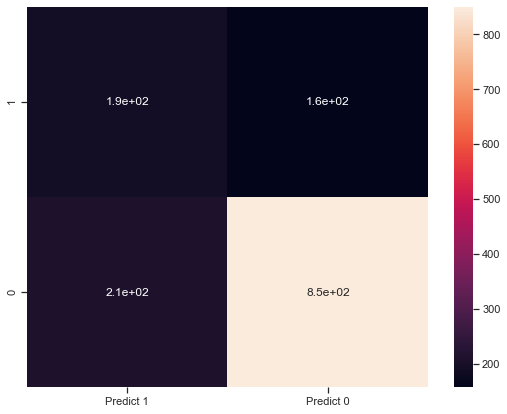

In [101]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

cm=metrics.confusion_matrix(y_test, y_pred_0, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

In [102]:
print("Decision Tree - Accuracy ",metrics.accuracy_score(y_test, y_pred_0))
print("Decision Tree - Precision",metrics.precision_score(y_test, y_pred_0))
print("Decision Tree - Recall   ",metrics.recall_score(y_test, y_pred_0))
print("Decision Tree - F1 score ",metrics.f1_score(y_test, y_pred_0))
print("Decision Tree - ROC      ",metrics.roc_auc_score(y_test, y_pred_0))


Decision Tree - Accuracy  0.7388218594748048
Decision Tree - Precision 0.47512437810945274
Decision Tree - Recall    0.5488505747126436
Decision Tree - F1 score  0.5093333333333334
Decision Tree - ROC       0.6749907915976036


In [103]:
X_train

SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  \
1814              0        1           1      12             1              0   
5946              0        0           0      42             1              0   
3881              0        1           0      71             1              1   
2389              0        1           1      71             1              1   
3676              0        0           0      30             1              0   
...             ...      ...         ...     ...           ...            ...   
905               1        0           0       9             1              1   
5192              0        0           1      60             1              0   
3980              0        0           0      28             1              1   
235               0        0           0       2             1              1   
5157              0        1           1      16             1              0   

      OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
1814              -1            -1                -1           -1  ...   
5946               1             1                 1            1  ...   
3881               1             1                 0            1  ...   
2389               1             0                 1            1  ...   
3676               1             1                 0            1  ...   
...              ...           ...               ...          ...  ...   
905                0             0                 1            0  ...   
5192              -1            -1                -1           -1  ...   
3980               0             1                 1            0  ...   
235                0             1                 0            0  ...   
5157               1             1                 0            1  ...   

      TotalCharges  PaymentMethod_Bank transfer (automatic)  \
1814        258.35                                        0   
5946       3160.55                                        0   
3881       4681.75                                        1   
2389       6300.85                                        0   
3676       2044.75                                        0   
...            ...                                      ...   
905         918.60                                        0   
5192       1189.90                                        0   
3980       2979.50                                        0   
235         114.10                                        0   
5157       1114.85                                        1   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1814                                      0                               0   
5946                                      1                               0   
3881                                      0                               0   
2389                                      0                               1   
3676                                      0                               1   
...                                     ...                             ...   
905                                       0                               1   
5192                                      0                               0   
3980                                      0                               1   
235                                       0                               0   
5157                                      0                               0   

      PaymentMethod_Mailed check  InternetService_DSL  \
1814                           1                    0   
5946                           0                    1   
3881                           0                    1   
2389                           0                    1   
3676                           0                    1   
...                          ...                  ...   
905                            0       

In [104]:
from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

In [105]:
from os import system
from IPython.display import Image

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng credit_tree.dot -o credit_tree.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("credit_tree.png"))

# 3. Model building and Improvement

In [106]:
!pip install xgboost

In [107]:
# 3A.......... Train model using XGBoost

import xgboost as xgb
from xgboost.sklearn import XGBClassifier

#from sklearn.grid_search import GridSearchCV   #Perforing grid search

xgb_mod = XGBClassifier(use_label_encoder=False)

xgb_mod.fit(X_train,y_train)

[10:44:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [108]:
print(xgb_mod.score(X_train,y_train))
print(xgb_mod.score(X_test,y_test))

0.9366347177848775
0.8019872249822569


In [109]:
y_pred_xgb = xgb_mod.predict(X_test)

with XGBoost - Accuracy  0.8019872249822569
with XGBoost - Precision 0.6029850746268657
with XGBoost - Recall    0.5804597701149425
with XGBoost - F1 score  0.5915080527086384
with XGBoost - ROC       0.7275531649820707


XGBoost Classifier  Accuracy  Precision   Recall  F1 score  ROC score
0         Base model  0.801987   0.602985  0.58046  0.591508   0.727553

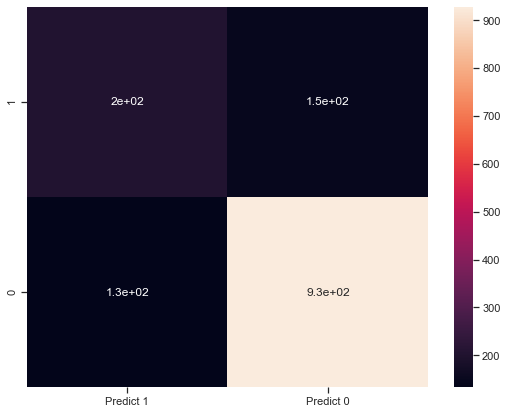

In [110]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

cm=metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("with XGBoost - Accuracy ",metrics.accuracy_score(y_test, y_pred_xgb))
print("with XGBoost - Precision",metrics.precision_score(y_test, y_pred_xgb))
print("with XGBoost - Recall   ",metrics.recall_score(y_test, y_pred_xgb))
print("with XGBoost - F1 score ",metrics.f1_score(y_test, y_pred_xgb))
print("with XGBoost - ROC      ",metrics.roc_auc_score(y_test, y_pred_xgb))

perf_cmp_Df = pd.DataFrame()

temp_perf_Df = pd.DataFrame({'XGBoost Classifier':["Base model"],'Accuracy': [metrics.accuracy_score(y_test, y_pred_xgb)],'Precision': [metrics.precision_score(y_test, y_pred_xgb)],'Recall': [metrics.recall_score(y_test, y_pred_xgb)],'F1 score': [metrics.f1_score(y_test, y_pred_xgb)],'ROC score': [metrics.roc_auc_score(y_test, y_pred_xgb)]})
perf_cmp_Df = pd.concat([perf_cmp_Df, temp_perf_Df])
perf_cmp_Df = perf_cmp_Df[['XGBoost Classifier','Accuracy','Precision','Recall','F1 score','ROC score']]
perf_cmp_Df            


[10:45:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.88604898828541
0.8076650106458482
Tuning 1 XGBoost - Accuracy  0.8076650106458482
Tuning 1 XGBoost - Precision 0.6199376947040498
Tuning 1 XGBoost - Recall    0.5718390804597702
Tuning 1 XGBoost - F1 score  0.5949177877428998
Tuning 1 XGBoost - ROC       0.7284266090329011


XGBoost Classifier  Accuracy  Precision  \
0                                         Base model  0.801987   0.602985   
0  l_rate =0.1,esti=200,depth=5,ch_weight=1,gamma...  0.807665   0.619938   

     Recall  F1 score  ROC score  
0  0.580460  0.591508   0.727553  
0  0.571839  0.594918   0.728427

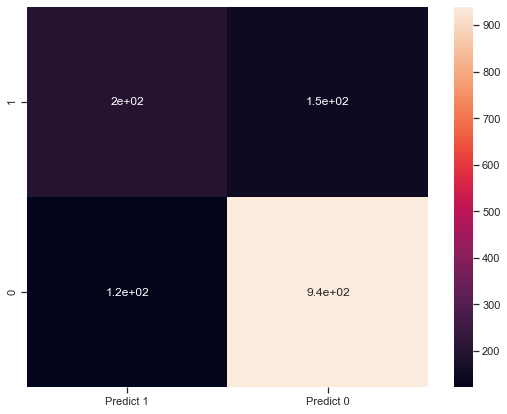

In [111]:
# 3B....... Improve performance of XGBoost 

xgb_mod = XGBClassifier(
 learning_rate =0.1,
 n_estimators=200,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective='binary:logistic',
 nthread=4,
 use_label_encoder=False,
 scale_pos_weight=1,seed=27)

xgb_mod.fit(X_train, y_train)

print(xgb_mod.score(X_train,y_train))
print(xgb_mod.score(X_test,y_test))

y_pred_xgb = xgb_mod.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("Tuning 1 XGBoost - Accuracy ",metrics.accuracy_score(y_test, y_pred_xgb))
print("Tuning 1 XGBoost - Precision",metrics.precision_score(y_test, y_pred_xgb))
print("Tuning 1 XGBoost - Recall   ",metrics.recall_score(y_test, y_pred_xgb))
print("Tuning 1 XGBoost - F1 score ",metrics.f1_score(y_test, y_pred_xgb))
print("Tuning 1 XGBoost - ROC      ",metrics.roc_auc_score(y_test, y_pred_xgb))

temp_perf_Df = pd.DataFrame({'XGBoost Classifier':["l_rate =0.1,esti=200,depth=5,ch_weight=1,gamma=0,s_bytree=0.8"],
                             'Accuracy': [metrics.accuracy_score(y_test, y_pred_xgb)],
                             'Precision': [metrics.precision_score(y_test, y_pred_xgb)],
                             'Recall': [metrics.recall_score(y_test, y_pred_xgb)],
                             'F1 score': [metrics.f1_score(y_test, y_pred_xgb)],
                             'ROC score': [metrics.roc_auc_score(y_test, y_pred_xgb)]})
perf_cmp_Df = pd.concat([perf_cmp_Df, temp_perf_Df])
perf_cmp_Df = perf_cmp_Df[['XGBoost Classifier','Accuracy','Precision','Recall','F1 score','ROC score']]
perf_cmp_Df            



In [112]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

xgb_model = XGBClassifier(use_label_encoder=False,eval_metric="logloss")

#List Hyperparameters to tune

eta = [0.01, 0.05, 0.10, 0.15]
gamma = [0, 0.1, 0.2, 0.3]
max_depth = [3, 4, 5]
min_ch_wgt= [1,3,5]
col_sam_tree= [0.3,0.4,0.5]

#convert to dictionary
hyperparameters = dict(learning_rate=eta, gamma=gamma, max_depth=max_depth, min_child_weight = min_ch_wgt, colsample_bytree=col_sam_tree)
#Making model
clf = GridSearchCV(xgb_model, hyperparameters, cv=5)
best_model = clf.fit(X_train,y_train)

#Best Hyperparameters Value
print("")
print('Best learning rate:', best_model.best_estimator_.get_params()['learning_rate'])
print('Best gamma:', best_model.best_estimator_.get_params()['gamma'])
print('Best max_depth:', best_model.best_estimator_.get_params()['max_depth'])
print('Best min_child_weight:', best_model.best_estimator_.get_params()['min_child_weight'])
print('Best colsample_bytree:', best_model.best_estimator_.get_params()['colsample_bytree'])


print("")
#Predict testing set
y_pred = best_model.predict(X_test)

print("GridSearchCV - Accuracy ",metrics.accuracy_score(y_test, y_pred))
print("GridSearchCV - Precision",metrics.precision_score(y_test, y_pred, average='weighted'))
print("GridSearchCV - Recall   ",metrics.recall_score(y_test, y_pred, average='weighted'))
print("GridSearchCV - F1 score ",metrics.f1_score(y_test, y_pred, average='weighted'))



Best learning rate: 0.1
Best gamma: 0.1
Best max_depth: 3
Best min_child_weight: 5
Best colsample_bytree: 0.5

GridSearchCV - Accuracy  0.8133427963094393
GridSearchCV - Precision 0.8094690029446563
GridSearchCV - Recall    0.8133427963094393
GridSearchCV - F1 score  0.811153986406265


In [115]:
# 3B....... Best performing hyperparameters are

#          Best learning rate: 0.1
#          Best gamma: 0.1
#          Best max_depth: 3
#          Best min_child_weight: 5
#          Best colsample_bytree: 0.5
    
#          and the best test performance is

#          GridSearchCV - Accuracy  0.8133427963094393
#          GridSearchCV - Precision 0.8094690029446563
#          GridSearchCV - Recall    0.8133427963094393
#          GridSearchCV - F1 score  0.811153986406265  

0.8462903798367057
0.8041163946061036
Tuning 2 XGBoost - Accuracy  0.8041163946061036
Tuning 2 XGBoost - Precision 0.6104294478527608
Tuning 2 XGBoost - Recall    0.5718390804597702
Tuning 2 XGBoost - F1 score  0.5905044510385757
Tuning 2 XGBoost - ROC       0.7260703413608935


XGBoost Classifier  Accuracy  Precision  \
0                                         Base model  0.801987   0.602985   
0  l_rate =0.1,esti=200,depth=5,ch_weight=1,gamma...  0.807665   0.619938   
0  l_rate =0.0.5,esti=250,depth=3,ch_weight=3,gam...  0.805536   0.612805   
0  l_rate =0.0.5,esti=250,depth=3,ch_weight=3,gam...  0.804116   0.610429   

     Recall  F1 score  ROC score  
0  0.580460  0.591508   0.727553  
0  0.571839  0.594918   0.728427  
0  0.577586  0.594675   0.728944  
0  0.571839  0.590504   0.726070

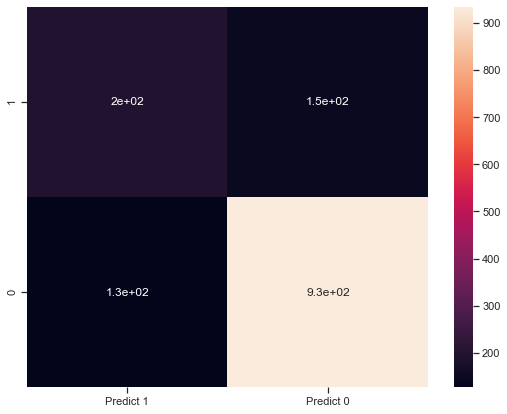

In [116]:
xgb = XGBClassifier(
 learning_rate =0.1,
 n_estimators=450,
 max_depth=3,
 min_child_weight=5,
 gamma=0.1,
 subsample=0.8,
 colsample_bytree=0.5,
 objective='binary:logistic',
 nthread=4,
 use_label_encoder=False,
 eval_metric="logloss",
 scale_pos_weight=1,seed=27)

xgb.fit(X_train, y_train)

print(xgb.score(X_train,y_train))
print(xgb.score(X_test,y_test))

y_pred_xgb = xgb.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred_xgb, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("Tuning 2 XGBoost - Accuracy ",metrics.accuracy_score(y_test, y_pred_xgb))
print("Tuning 2 XGBoost - Precision",metrics.precision_score(y_test, y_pred_xgb))
print("Tuning 2 XGBoost - Recall   ",metrics.recall_score(y_test, y_pred_xgb))
print("Tuning 2 XGBoost - F1 score ",metrics.f1_score(y_test, y_pred_xgb))
print("Tuning 2 XGBoost - ROC      ",metrics.roc_auc_score(y_test, y_pred_xgb))

temp_perf_Df = pd.DataFrame({'XGBoost Classifier':["l_rate =0.0.5,esti=250,depth=3,ch_weight=3,gamma=0.2,s_bytree=0.4"],
                             'Accuracy': [metrics.accuracy_score(y_test, y_pred_xgb)],
                             'Precision': [metrics.precision_score(y_test, y_pred_xgb)],
                             'Recall': [metrics.recall_score(y_test, y_pred_xgb)],
                             'F1 score': [metrics.f1_score(y_test, y_pred_xgb)],
                             'ROC score': [metrics.roc_auc_score(y_test, y_pred_xgb)]})
perf_cmp_Df = pd.concat([perf_cmp_Df, temp_perf_Df])
perf_cmp_Df = perf_cmp_Df[['XGBoost Classifier','Accuracy','Precision','Recall','F1 score','ROC score']]
perf_cmp_Df            


In [64]:
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

[14:43:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.354577


In [65]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[14:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[14:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [66]:
cv_results.head(10)

train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         0.479932        0.000444        0.480428       0.000266
1         0.464723        0.001017        0.465395       0.001602
2         0.452284        0.001441        0.453515       0.000340
3         0.439544        0.001557        0.441052       0.001102
4         0.429754        0.002944        0.431591       0.002260
5         0.421163        0.001664        0.423180       0.002409
6         0.412995        0.001716        0.415241       0.002067
7         0.405852        0.001942        0.408474       0.002092
8         0.400392        0.001260        0.403382       0.002611
9         0.395491        0.002103        0.398697       0.002633

In [78]:
print((cv_results["test-rmse-mean"]).tail(1))

49    0.368023
Name: test-rmse-mean, dtype: float64


In [67]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[14:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


0.8143414980475683
0.8034066713981547
Trees - 100, rate=0.05 XGB - Accuracy  0.8034066713981547
Trees - 100, rate=0.05 XGB - Precision 0.6187290969899666
Trees - 100, rate=0.05 XGB - Recall    0.5316091954022989
Trees - 100, rate=0.05 XGB - F1 score  0.5718701700154559
Trees - 100, rate=0.05 XGB - ROC       0.7120816947793775


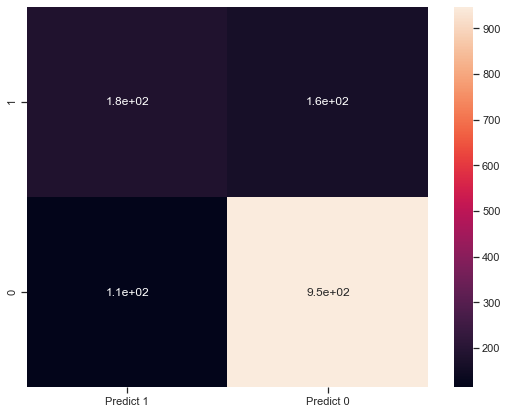

In [104]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 100, learning_rate = 0.05, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

print(gbcl.score(X_train,y_train))
print(gbcl.score(X_test,y_test))

y_pred_4 = gbcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred_4, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("Trees - 100, rate=0.05 XGB - Accuracy ",metrics.accuracy_score(y_test, y_pred_4))
print("Trees - 100, rate=0.05 XGB - Precision",metrics.precision_score(y_test, y_pred_4))
print("Trees - 100, rate=0.05 XGB - Recall   ",metrics.recall_score(y_test, y_pred_4))
print("Trees - 100, rate=0.05 XGB - F1 score ",metrics.f1_score(y_test, y_pred_4))
print("Trees - 100, rate=0.05 XGB - ROC      ",metrics.roc_auc_score(y_test, y_pred_4))


0.8230386936457224
0.808374733853797
Trees - 125, rate=0.08 XGB - Accuracy  0.808374733853797
Trees - 125, rate=0.08 XGB - Precision 0.6242038216560509
Trees - 125, rate=0.08 XGB - Recall    0.5632183908045977
Trees - 125, rate=0.08 XGB - F1 score  0.5921450151057401
Trees - 125, rate=0.08 XGB - ROC       0.7260012783429208


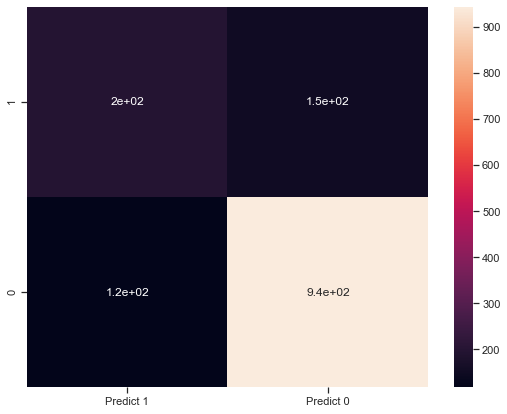

In [105]:
gbcl = GradientBoostingClassifier(n_estimators = 125, learning_rate = 0.08, random_state=1)
gbcl = gbcl.fit(X_train, y_train)

print(gbcl.score(X_train,y_train))
print(gbcl.score(X_test,y_test))

y_pred_5 = gbcl.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_pred_5, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (9,7))
sns.heatmap(df_cm, annot=True)

print("Trees - 125, rate=0.08 XGB - Accuracy ",metrics.accuracy_score(y_test, y_pred_5))
print("Trees - 125, rate=0.08 XGB - Precision",metrics.precision_score(y_test, y_pred_5))
print("Trees - 125, rate=0.08 XGB - Recall   ",metrics.recall_score(y_test, y_pred_5))
print("Trees - 125, rate=0.08 XGB - F1 score ",metrics.f1_score(y_test, y_pred_5))
print("Trees - 125, rate=0.08 XGB - ROC      ",metrics.roc_auc_score(y_test, y_pred_5))


# Part B - Domain IT

In [ ]:
#  working only with the TelecomCustomers-Churn_2.csv as a part of modularisation.

In [4]:
    # importing all the necessary libraries

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    
    from sklearn import preprocessing
    from sklearn.model_selection import train_test_split
    
    #.. importing the classifier libraries    
    
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import GradientBoostingClassifier
    import xgboost as xgb
    from xgboost.sklearn import XGBClassifier
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.svm import SVC  

    # importing the metrics libraries
    
    from sklearn import metrics
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import mean_squared_error

    # importing the tree libraries
    
    from sklearn.tree import export_graphviz
    from os import system
    from IPython.display import Image
    
    import pickle
    
    global np,pd,plt,sns, xgb
    
    global resultsDf
            
    def csv(file):  #  called from data_under function
        
        print("passed file",file) 
        global data
    
        data = pd.read_csv(file) # loading the csv file into a dataframe
        data.head(10)
        
        return
    
    def details(df):  # called from data_under function
        
        print("Datatypes :",df.dtypes)  # printing the datatypes
        print("")
        print("Dataframe shape :",df.shape)  # printing the shape ------ row, columns
        print("")
        print("Describe",df.describe())   # printing the 5 point summary
        print("")
        print("sample records",df.head(10))
    
    def data_under(file):
        
        csv(file)  # passing a csv file as an argument to read into a dataframe
        details(data) # printing the datatypes, shape and 5 point summary
    
    def null_check(data):  # to check if there are any missing values / nulls and fill them up with median values.
        
        data.isnull().any().sum()
        data.TotalCharges = pd.to_numeric(data.TotalCharges, errors="coerce")
        data.isnull().values.any()
        median = data['TotalCharges'].median()  # this column has 11 missing values and is updated with median values
        data['TotalCharges'].fillna(median, inplace=True)  # dataframe filled with median values
    
        return data
    
    def show_data(data):  # to check the distribution of categorical column data

        for i in data.columns:
            if ((i in ["customerID","MonthlyCharges","TotalCharges"])):  # since they are not categorical columns
                print()
            else:   
                print("% S unique values", i)
                print(data[i].value_counts())
                print("")
    
    def prep_exp(data):
        
        null_check(data)
        show_data(data)
    
    def hist(data): # to print histograms for all the categorical columns

        for i in data.columns:
            if ((i in ["customerID","MonthlyCharges","TotalCharges"])):  # not considering since they are not categorical
                print()
            else:   
                fig = plt.figure(figsize = (10,8))
                ax = fig.gca()
                plt.figure(i)
                sns.histplot(data[i], kde=True, ax=ax)
                            
    def pie_new(data): # printing pie charts for all the categorical columns
        
        for i in data.columns:
            if (data[i].dtypes == "object"):
            
                if i in ["customerID","MonthlyCharges","TotalCharges"]:
                    print()
                else:
                    print("column is %S",i)                                
                    data.groupby(i).size().plot(kind='pie', subplots=True, shadow=True, startangle=30, figsize=(8,6), autopct='%1.2f%%')                
                    plt.tight_layout()
                    plt.show()
    
    def encode(data): # to encode the categorical variables
        
        global new_data
        replaceSt = {
        "OnlineBackup":      {"Yes": 1, "No": 0 ,"No internet service": -1},
        "DeviceProtection":  {"Yes": 1, "No": 0 ,"No internet service": -1},
        "TechSupport":       {"Yes": 1, "No": 0 ,"No internet service": -1},
        "StreamingTV":       {"Yes": 1, "No": 0 ,"No internet service": -1},
        "StreamingMovies":   {"Yes": 1, "No": 0 ,"No internet service": -1},
        "Contract":          {"Month-to-month": 1, "One year": 2 ,"Two year": 3},
        "Churn":             {"Yes": 1, "No": 0 },                
        "PaperlessBilling":  {"Yes": 1, "No": 0 } 
        }
        oneHot=["PaymentMethod"] # since ordering payment methods isnt possible, oneHot encoding it - creating multiple columns 
    
        new_data=data.replace(replaceSt)
        new_data=pd.get_dummies(new_data, columns=oneHot)  # new_data dataframe with encoded data
        new_data.head(10)
    
        return(new_data)

    def cor(new_data): # function to create correlation among all the variables and printing heatmap

        sns.set(rc={'figure.figsize':(15.7,8)})
        sns.set(style="ticks", color_codes=True)
        font1 = {'family':'serif','color':'blue','size':20}
        plt.title("Corelation", fontdict = font1)
        sns.heatmap(new_data.corr(), annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu")
        
    def analysis(data):
        hist(data)
        pie_new(data)
        encode(data)
        cor(new_data)
    
    def split(new_data):  # splitting the Independent and Dependent variables 
    
        global X,y,X_train1,y_train1,X_test1,y_test1
        
        X = new_data.drop(["customerID","Churn"], axis=1)   #........... Independent variables, 
        y = new_data['Churn']                               #.............. Dependent variable
                    
        X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=.20, random_state=2)
               
        return
    
    def export_tree(dt_model):  # visualizing a tree picture for the decision tree

        train_char_label = ['No', 'Yes']
        Credit_Tree_File = open('IT_credit_tree.dot','w')
        dot_data = export_graphviz(dt_model, out_file=Credit_Tree_File, feature_names = list(X_train1), class_names = list(train_char_label))
        Credit_Tree_File.close()
    
        retCode = system("dot -Tpng IT_credit_tree.dot -o IT_credit_tree.png")
        if(retCode>0):
            print("system command returning error: "+str(retCode))
        else:
            print("Displaying tree image")
            display(Image("IT_credit_tree.png"))   # displaying the tree image
    
    def un_pikling(X_test1,y_test1):   # unpickling the GradientBoosting model and predicting the dependent variable
    
        # load model
        with open('model.pkl', 'rb') as f:
            loaded_classifier = pickle.load(f)

        # predict
        y_true = y_test1
        y_pred = loaded_classifier.predict(X_test1)
        print("")
        print('pickle for Gradientclassifier: accuracy:', metrics.accuracy_score(y_true, y_pred))
    
    
    def mod_fit(X_train1,y_train1,X_test1,y_test1):  # Calling multiple classifier models to fit the training data
        
        mod = [DecisionTreeClassifier(criterion = 'gini', random_state=2),
       GradientBoostingClassifier(n_estimators = 75, learning_rate = 0.04, random_state=1),
       XGBClassifier(learning_rate =0.1,n_estimators=200,max_depth=5,min_child_weight=1,gamma=0,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',nthread=4,scale_pos_weight=1,eed=27),
       KNeighborsClassifier(n_neighbors= 5, weights = 'distance' ),
       LogisticRegression(solver='liblinear'),
       SVC(kernel='linear')]

        global resultsDf
        
        resultsDf = pd.DataFrame()
        
        for i in mod:
            
            model = i
            
            new_i = str(i)  # Classification models passed need to be converetd to string
            sub_i = new_i[0:new_i.find("(")]   # to pick the leftmost characters before the "(" paranthesis
            
            if sub_i == "SVC":   # standardization being carried out only for SVC model
                
                X_stan = preprocessing.scale(X)
                X_train1, X_test1, y_train1, y_test1 = train_test_split(X_stan, y, test_size=.20, random_state=2)
                
            elif sub_i == "DecisionTreeClassifier":     # Tree visualization created only for Decision tree classifier          
                
                model.fit(X_train1, y_train1)
                export_tree(model)
                
            elif sub_i == "GradientBoostingClassifier":  
                
                # Since this is the best performing model creating a pickle file for it
                
                model.fit(X_train1, y_train1)
                pickle.dump(model, open('model.pkl','wb'))  # writing the model to a pickle file in binary mode.
                
                                        
            model.fit(X_train1, y_train1)
            
            print("")
    
            y_pred = model.predict(X_test1)
    
            cm=metrics.confusion_matrix(y_test1, y_pred, labels=[1, 0])   # Creatng a confusion matrix to check the metrics

            df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
            plt.figure(figsize = (9,7))
            font1 = {'family':'serif','color':'blue','size':20}
            plt.title(sub_i, fontdict = font1)
            sns.heatmap(df_cm, annot=True, linewidths=0.5, center=0, cbar=False, cmap="YlGnBu") 
            
            # collecting the metrics after each classifier prediction.
                                             
            tempResultsDf = pd.DataFrame({'Method':[sub_i],'Accuracy': [metrics.accuracy_score(y_test1, y_pred)],'Precision': [metrics.precision_score(y_test1, y_pred)],'Recall': [metrics.recall_score(y_test1, y_pred)],'F1 score': [metrics.f1_score(y_test1, y_pred)],'ROC score': [metrics.roc_auc_score(y_test1, y_pred)]})
            
            resultsDf = pd.concat([resultsDf, tempResultsDf])
            
            resultsDf = resultsDf[['Method','Accuracy','Precision','Recall','F1 score','ROC score']]
            
            
        return(resultsDf)
        
    def final_perf(resultDf):  # Checking the best performing classifier and printing metric graphs
        print("")
        print("Max accuracy")
        print(resultsDf['Accuracy'].max())
        
        print( resultsDf[resultsDf.loc[:,"Accuracy"] == resultsDf["Accuracy"].max() ] )
        
        resultsDf.plot.barh(x='Method', y='Accuracy', title='Accuracy comparison', color='orange')
        
        ax = resultsDf.plot.bar(rot=0)
                    
    def model_building(data):
    
        split(new_data)
        mod_fit(X_train1,y_train1,X_test1,y_test1)
                        
    def main(file):   # Main function which calls all the sub functions 
        
        data_under(file)
        prep_exp(data)
        analysis(data)
        model_building(data)
        details(resultsDf)
        final_perf(resultsDf)
        un_pikling(X_test1,y_test1)
        
        
        return
        
        if __name__ == "__main__":
            sys.exit(main())

passed file TelcomCustomer-Churn_2.csv
Datatypes : customerID           object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Dataframe shape : (7043, 12)

Describe        MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

sample records    customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes      

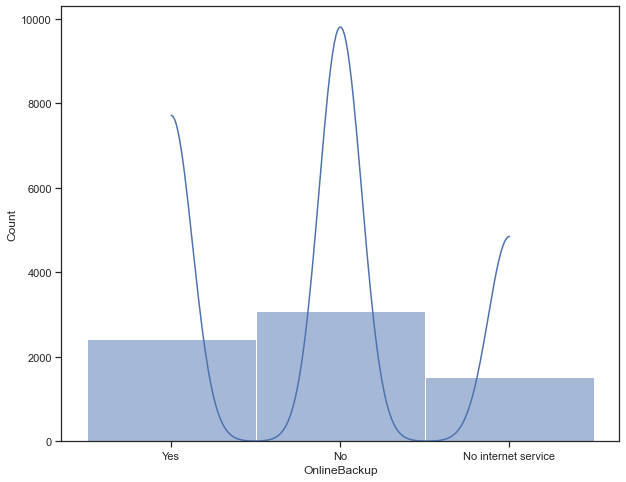

<Figure size 432x288 with 0 Axes>

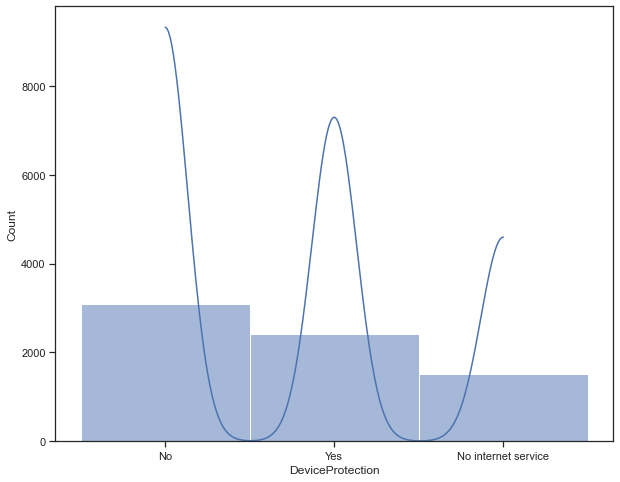

<Figure size 432x288 with 0 Axes>

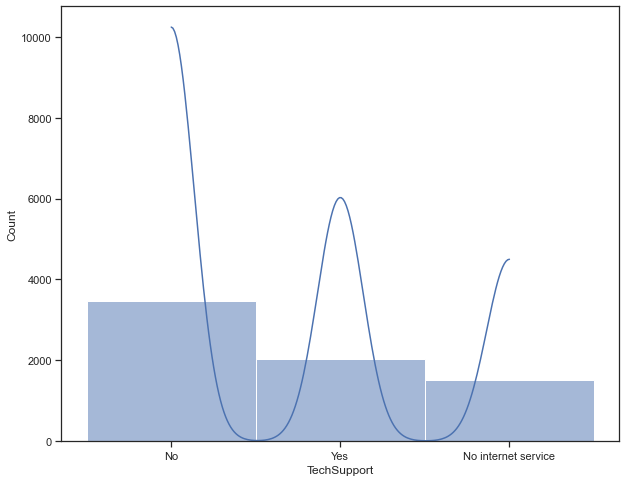

<Figure size 432x288 with 0 Axes>

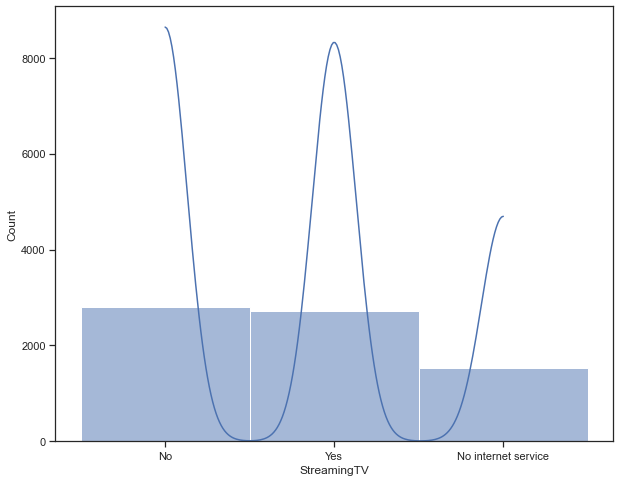

<Figure size 432x288 with 0 Axes>

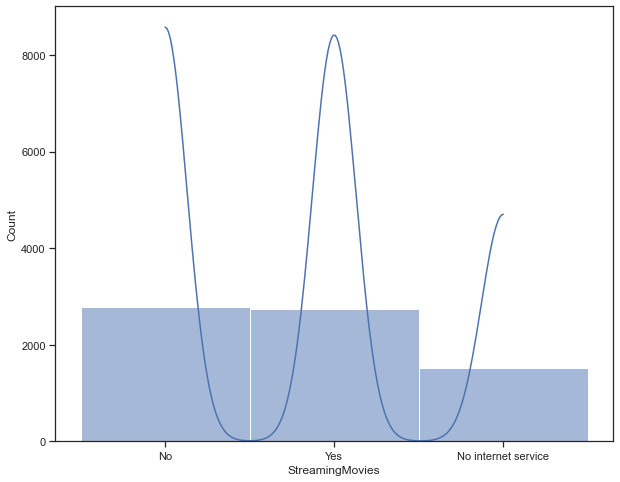

<Figure size 432x288 with 0 Axes>

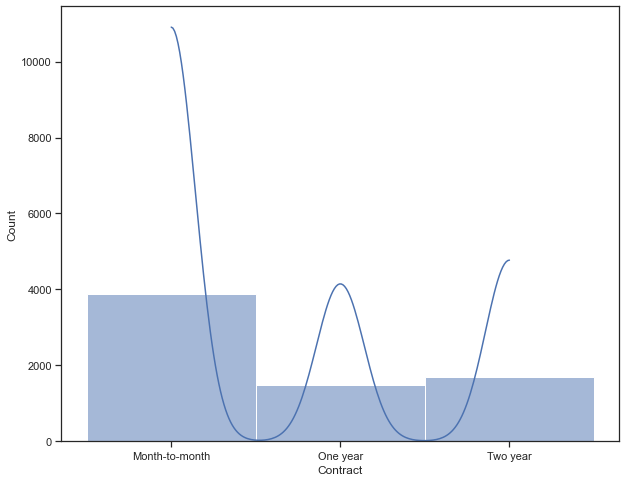

<Figure size 432x288 with 0 Axes>

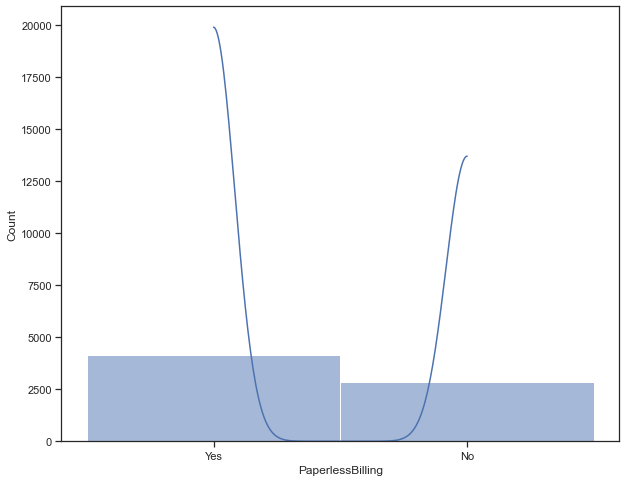

<Figure size 432x288 with 0 Axes>

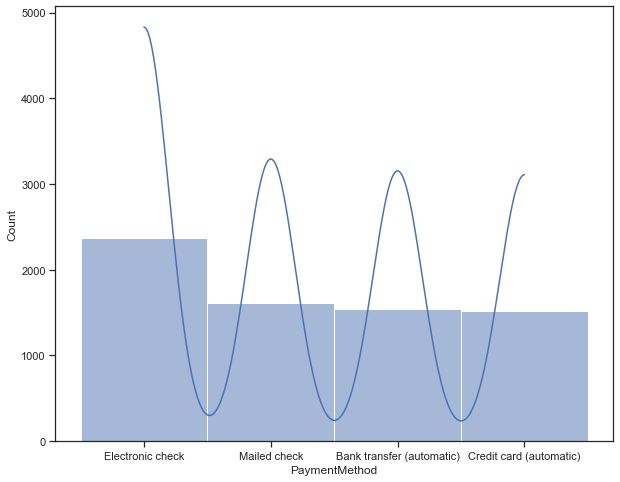

<Figure size 432x288 with 0 Axes>

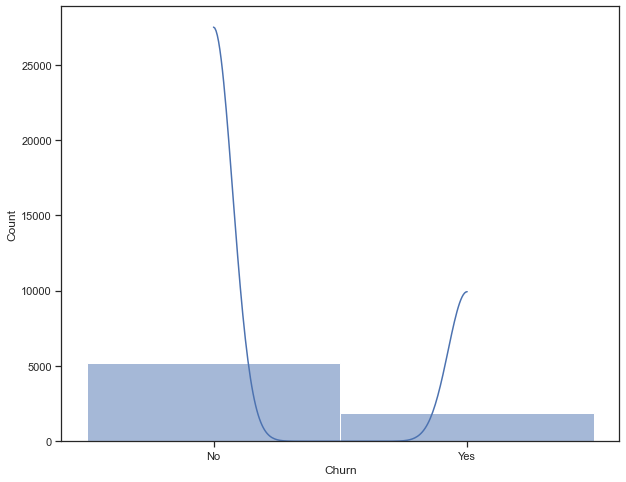

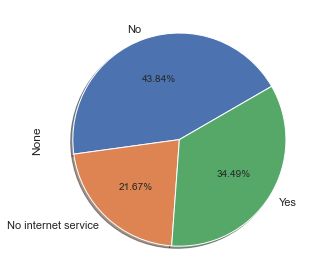

column is %S DeviceProtection


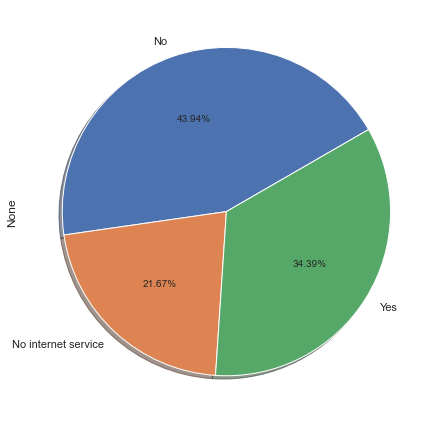

column is %S TechSupport


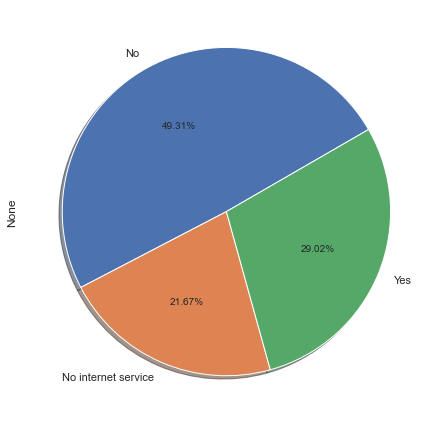

column is %S StreamingTV


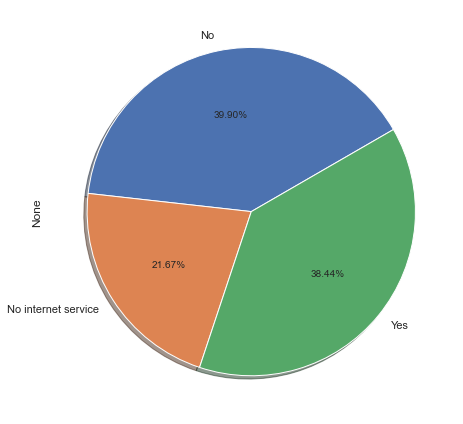

column is %S StreamingMovies


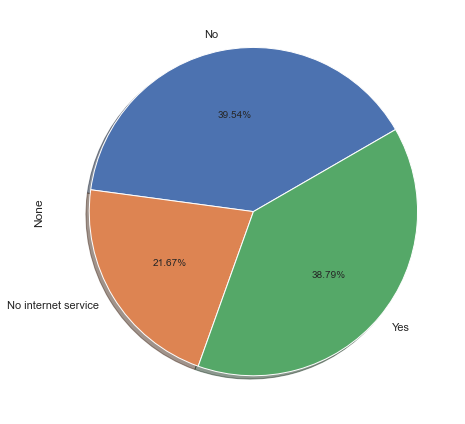

column is %S Contract


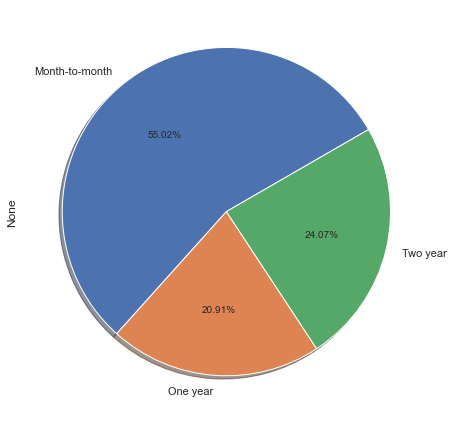

column is %S PaperlessBilling


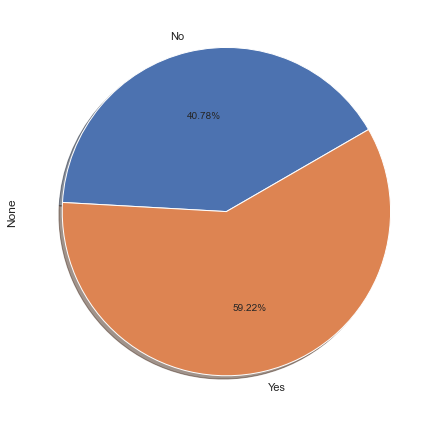

column is %S PaymentMethod


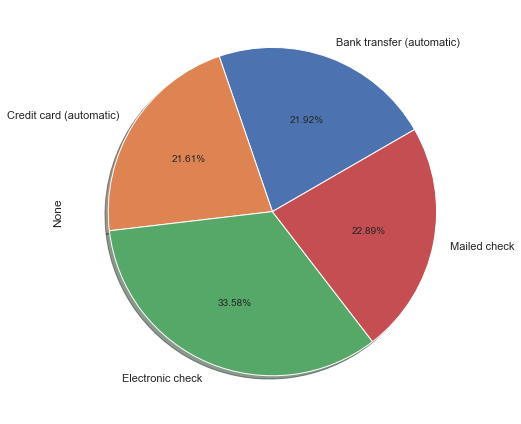

column is %S Churn


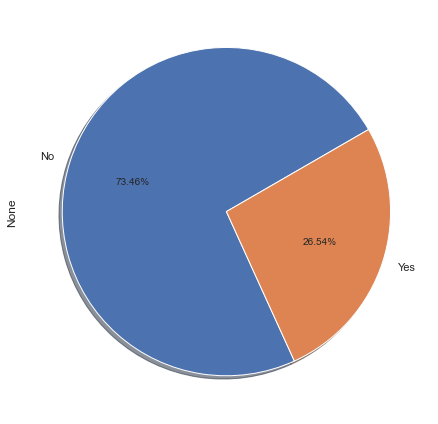

Displaying tree image




[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "eed" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[15:19:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)






Datatypes : Method        object
Accuracy     float64
Precision    float64
Recall       float64
F1 score     float64
ROC score    float64
dtype: object

Dataframe shape : (6, 6)

Describe        Accuracy  Precision    Recall  F1 score  ROC score
count  6.000000   6.000000  6.000000  6.000000   6.000000
mean   0.780932   0.582531  0.463123  0.512198   0.674147
std    0.030644   0.080497  0.032123  0.028070   0.016875
min    0.724627   0.449239  0.422414  0.475728   0.652048
25%    0.775195   0.557962  0.438937  0.488287   0.660039
50%    0.792051   0.600701  0.468391  0.526427   0.682185
75%    0.794535   0.607364  0.478448  0.532582   0.686323
max    0.811923   0.691244  0.508621  0.534400   0.688105

sample records                        Method  Accuracy  Precision    Recall  F1 score  \
0      DecisionTreeClassifier  0.724627   0.449239  0.508621  0.477089   
0  GradientBoostingClassifier  0.811923   0.691244  0.431034  0.530973   
0               XGBClassifier  0.794890   0.6088

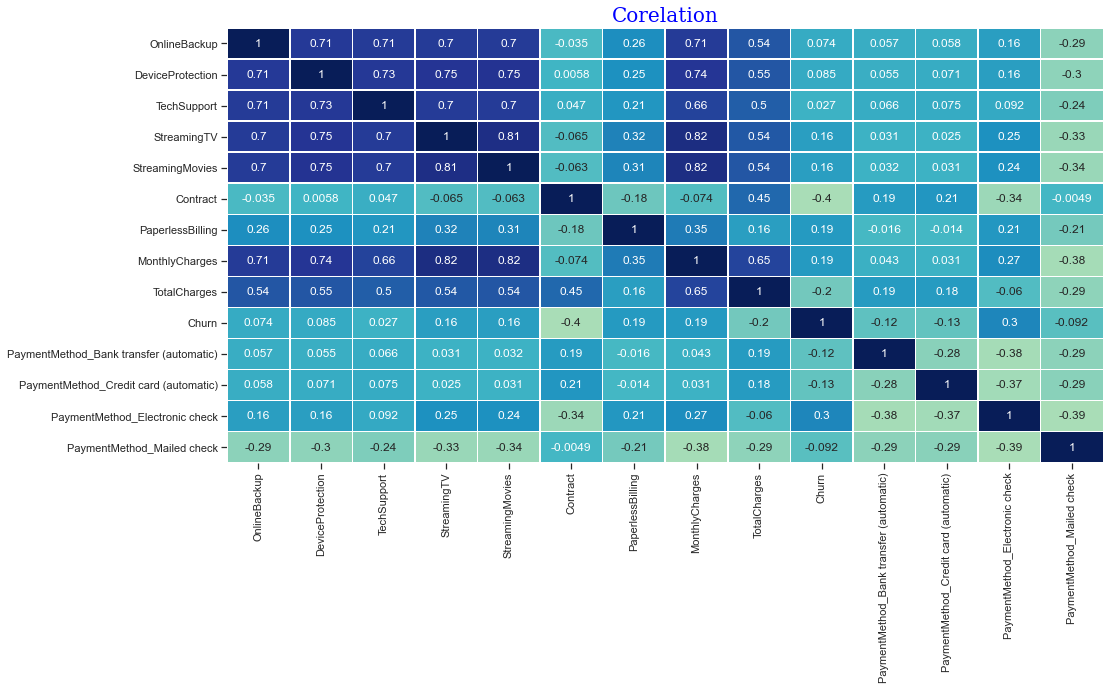

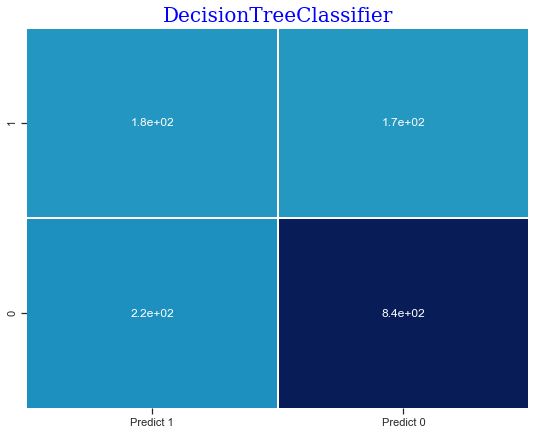

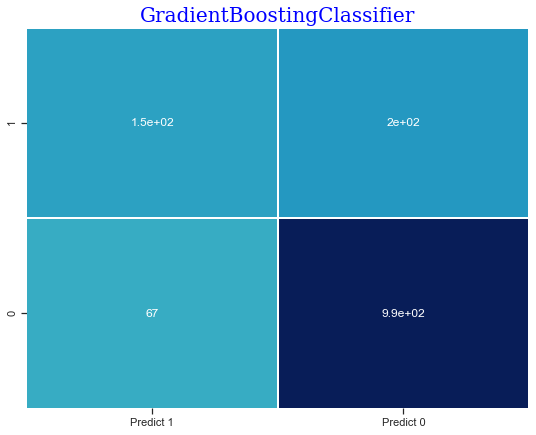

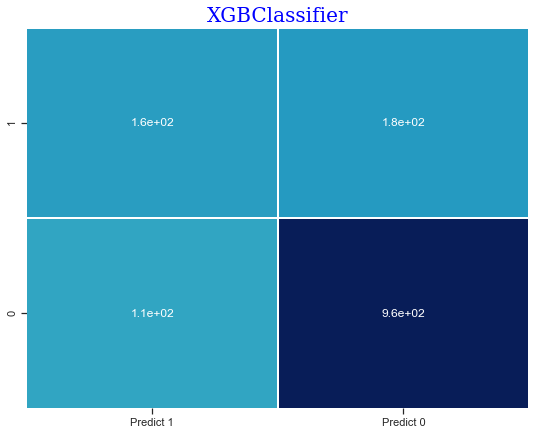

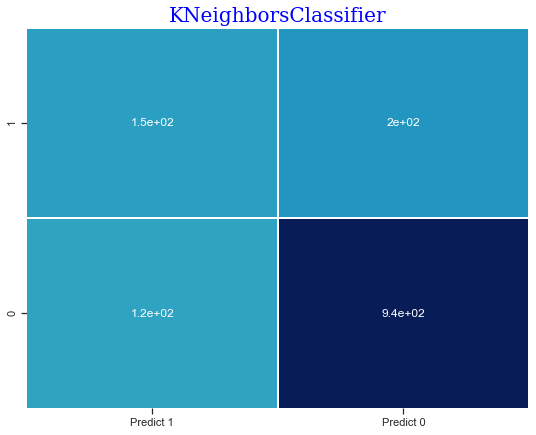

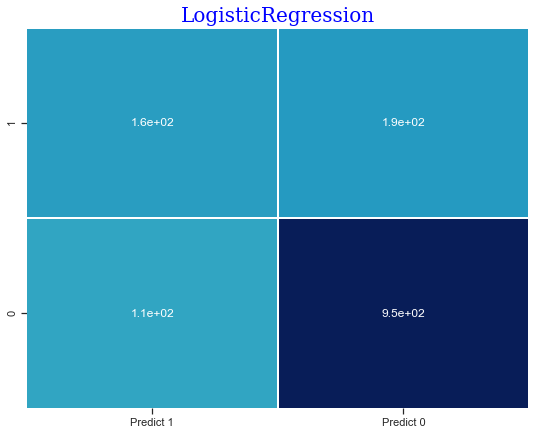

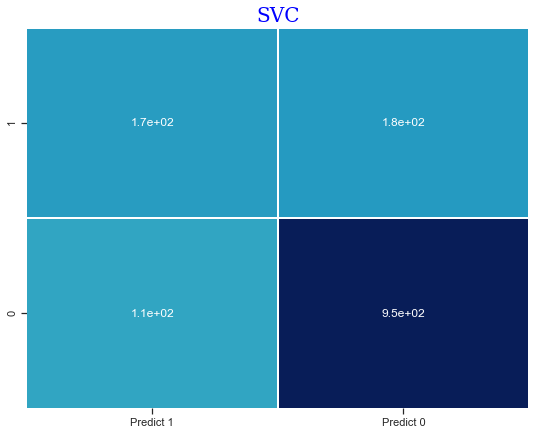

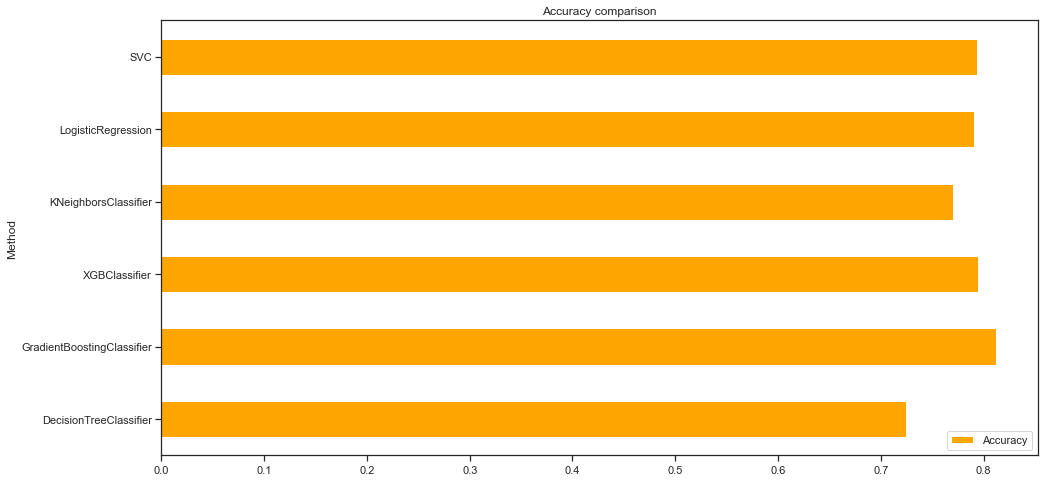

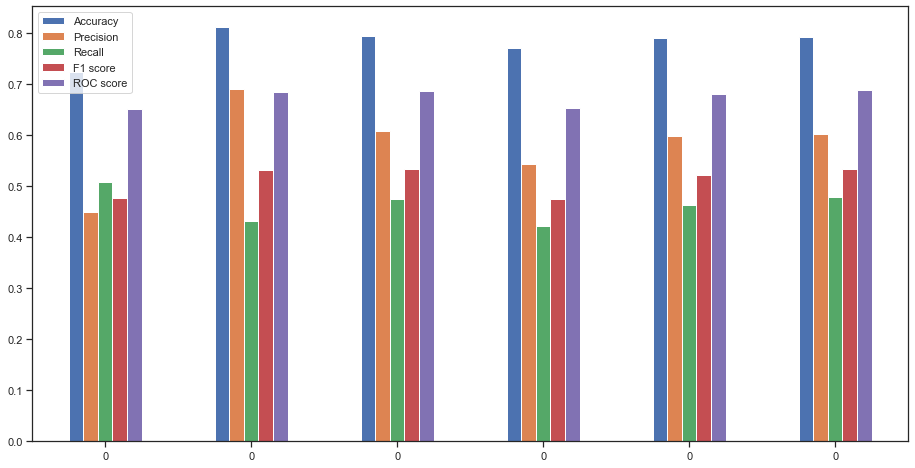

In [5]:
main("TelcomCustomer-Churn_2.csv")